## **Payment System Analysis of NYC Yellow Taxis** <br>

### Created By: Joel Bernard Leonardo <br>

Dataset: **New York City TLC Trip Record**

### **Business Problem Understanding**

**Context:**<br>

Ada 2 perusahaan Penyedia Layanan Sistem Pembayaran untuk Yellow Cabs yaitu Creative Mobile Technologies, LLC dan VeriFone Inc.
(Sebagai pihak ketiga untuk Yellow cabs) di New York City (NYC) ingin meningkatkan penghasilannya dengan mengoptimalkan operasional bisnis mereka. Perusahaan ini memiliki akses ke data rekaman perjalanan (trip records) yang dilakukan oleh para pengemudi taksi yang tercatat oleh NYC Taxi and Limousine Commission (TLC). Data tersebut mencakup informasi tentang lokasi penjemputan, waktu perjalanan, tarif, metode pembayaran, dan lain-lain selama bulan January 2023. Perusahaan ingin menggunakan data tersebut untuk mengidentifikasi **Adakah** faktor-faktor yang dapat mempengaruhi sistem pembayaran yang telah mereka sediakan. <br>

    Note: Posisi saya sebagai Freelancer.
<br>

**Problem Statement:** <br>

Kedua Perusahaan Penyedia Layanan Sistem Pembayaran tersebut ingin meningkatkan penghasilannya memlalui sistem pembayaran mereka. Dengan cara, memahami faktor-faktor apa yang dapat meningkat para konsumen membayar taxi lewat sistem penyedia mereka yaitu Mesin EDC mereka yang berfokus pada pembayaran menggunakan metode Credit Card. Mereka ingin memanfaatkan data rekaman perjalanan (trip records) yang dilakukan oleh para pengemudi taksi. <br>

<br>

**Goal:** <br>

Maka berdasarkan permasalahan tersebut, perusahaan ingin mencari tahu faktor-faktor apa saja yang dapat menjadi hal rekomendasi untuk meningkatkan penghasilannya yaitu bagaimana orang mau membayar taxi mereka menggunakan metode credit card.

<br>

**Analytic Approach :** <br >

Jadi yang akan saya lakukan adalah menganalisis data rekaman tersebut untuk menemukan faktor apa yang dapat mempengaruhi peningkatan penghasilan dari kedua perusahaan Penyedia Sistem Pembanyaran tersebut dari data rekaman yang mereka punya.<br>


---
### **Data UnderStanding**

In [185]:
# Library
import pandas as pd
import numpy as np
from datetime import datetime
from operator import attrgetter
from IPython.display import Image
import matplotlib.ticker as ticker

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
from IPython.display import display
import matplotlib.patches as patches
import folium

# Testing
from statsmodels.stats.diagnostic import lilliefors
from statsmodels.stats.proportion import proportions_ztest
import statsmodels.api as sm
import scipy.stats as stats

# Set max columns
pd.set_option('display.max_columns',None)

Dataset Source: Purwadhika <br>

Sebelum memulai analisis data, tahapan *"data understanding"* perlu dilakukan untuk mengenal lebih jauh dataset yang akan digunakan. Dalam tahapan ini, akan diidentifikasi anomali-anomali yang terdapat dalam dataset yang perlu diatasi pada tahap *"data cleaning"*. <br>

NOTE: Pada kasus ini saya mengasumsi bahwa data ini merupakan data perjalanan taxi kuning (Yellow Cabs) tahun 2023 bulan Januari, yang diberi lisensi TLC dan yang beroperasional di kota NEW YORK CITY untuk membawa penumpang.<Br>

Dataset ini berisi informasi terkait rekaman para pengemudi yang ada pada 2 perusahaan tersebut.<br>
Ada 17 kolom di dalam dataset ***New York City TLC Trip Record*** berdasarkan  Data Dictionary yang saya dapatkan:<br>

 - **VendorID** : Kode yang menunjukkan/mengindikasikan provider LPEP yang menyediakan data/catatan/rekaman.<br>
              1 = Creative Mobile Technologies, LLC.<br>
              2 = VeriFone Inc.<br>
              (Note: Kolom ini adalah Vendor/Provider penyedia sistem pembayaran berdasarakan research yang saya lakukan di Google.
              Jadi vendor diatas ini BUKAN perusahaan Taxi, MELAINKAN Perushaan Sistem Pembayaran yang dimana vendor tersebut dapat melihat
              rekaman perjalanan taxi juga.)


 - **lpep_pickup_datetime** : Tanggal dan waktu saat meteran diaktifkan.<br>

 - **lpep_dropoff_datetime** : Tanggal dan waktu saat meteran dinonaktifkan.<br>

 - **Passenger_count** : Jumlah penumpang di dalam kendaraan. Ini merupakan nilai/angka yang dimasukkan oleh driver/pengemudi.<br>

 - **Trip_distance** : Jarak perjalanan yang telah ditempuh (dalam satuan miles) yang dilaporkan oleh Argometer.<br>

 - **PULocationID** : Zona Taksi TLC dimana Argometer digunakan/dinyalakan.<br>

 - **DOLocationID** : Zona Taksi TLC dimana Argometer dinonaktifkan/dimatikan.<br>

 - **RateCodeID** : Kode tarif akhir yang berlaku pada akhir perjalanan.<br>
                    1 = Standard rate: Tarif standar untuk perjalanan taksi di New York City.<br>
                    2 = JFK: Tarif yang berlaku untuk perjalanan dari New York City ke Bandara Internasional John F. Kennedy (JFK)<br>
                    3 = Newark: Tarif yang berlaku untuk perjalanan dari New York City ke kota Newark<br>
                    4 = Nassau or Westchester: Tarif yang berlaku untuk perjalanan ke Nassau County atau Westchester County.<br>
                    5 = Negotiated fare: Tarif yang ditetapkan melalui negosiasi antara penumpang dan sopir taksi.<br>
                    6 = Group ride: Tarif yang berlaku untuk perjalanan dalam kelompok yang sama.<br>

 - **Store_and_fwd_flag** : Bendera ini menunjukkan apakah catatan perjalanan disimpan di memori kendaraan sebelum dikirimkan ke vendor, alias "simpan dan teruskan," karena                       kendaraan tidak memiliki koneksi ke server.<br>
                                Y = store and forward trip<br>
                                N = not a store and forward trip<br>

 - **Payment_type** : Kode numerik yang menunjukkan bagaimana sang penumpang melakukan pembayaran.<br>
 1 = Credit card <br>
 2 = Cash<br>
 3 = No charge (tidak dikenakan biaya, seperti pada perjalanan gratis)<br>
 4 = Dispute (bila ada perselisihan atau keberatan atas biaya yang dikenakan, Pembayaran bisa CASH atau Credit Card)<br>
 5 = Unknown (tidak diketahui)<br>
 6 = Voided trip (bila perjalanan dibatalkan)<br>

 - **Fare_amount** : Tarif waktu-dan-jarak dihitung berdasarkan meteran. Biaya lain-lain dan biaya tambahan. Saat ini, hal tersebut hanya mencakup $0.50 dan $1 saat jam sibuk dan biaya saat malam hari/semalaman.<br>

 - **MTA_tax** : Pajak MTA sebesar $0.50 akan berjalan secara otomatis berdasarkan tarif meteran yang digunakan.<br>

 - **Extra** : biaya tambahan yang dikenakan atas permintaan pelanggan<br>

 - **Improvement_surcharge** : Biaya ekstra sebesar $0.30 akan dikenakan pada perjalanan-perjalanan pendek. Biaya tersebut mulai dikenakan pada tahun 2015.<br>

 - **Tip_amount** : Kolom ini secara otomatis diisi dengan pemberian tip melalui credit card. Pemberian tip secara tunai tidak dimasukkan.<br>

 - **Tolls_amount** : Jumlah total dari semua biaya jalur toll sepanjang perjalanan.<br>

 - **Total_amount** : Jumlah total yang dikenakan kepada penumpang. Tidak termasuk tip secara cash/tunai<br>

 - **Trip_type** : Kode yang mengindikasikan apakah perjalanan tersebut merupakan street hail atau perjalanan resmi yang dihitung berdasarkan tarif meteran yang digunakan, tetapi dapat diubah oleh sang pengemudi.<br>
1 = Street-hail (Memanggil Taxi yang lewat di jalan)<br>
2 = Dispatch (Memesan Taxi lewat nomor telepon atau Uber)<br>
                    


In [186]:
# Load Dataset
NYC_Taxi_Set_raw = pd.read_csv(r'D:\File Sekul Purwadhika\DS STUFF\Modul_2\Data_Analyst\Data_Set\Project_Capstone\New York City Taxi and Limousine Trip Record\NYC TLC Trip Record.csv')
display(NYC_Taxi_Set_raw.head(),NYC_Taxi_Set_raw.tail())



C:\Users\joelb\AppData\Local\Temp\ipykernel_12208\2805143413.py:2: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  NYC_Taxi_Set_raw = pd.read_csv(r'D:\File Sekul Purwadhika\DS STUFF\Modul_2\Data_Analyst\Data_Set\Project_Capstone\New York City Taxi and Limousine Trip Record\NYC TLC Trip Record.csv')


,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,1.0,0.5,4.03,0.0,NaN,1.0,24.18,1.0,1.0,2.75
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,1.0,0.5,2.64,0.0,NaN,1.0,15.84,1.0,1.0,0.00
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.2,1.0,0.5,1.94,0.0,NaN,1.0,11.64,1.0,1.0,0.00
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,0.5,1.5,1.70,0.0,NaN,1.0,10.20,1.0,1.0,0.00
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,0.5,1.5,0.00,0.0,NaN,1.0,8.00,1.0,1.0,0.00


,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
68206,2,2023-01-31 22:29:00,2023-01-31 22:42:00,NaN,NaN,49,62,NaN,4070.82,15.70,0.0,0.0,0.00,0.0,NaN,1.0,16.70,NaN,NaN,NaN
68207,2,2023-01-31 22:40:00,2023-01-31 22:48:00,NaN,NaN,10,205,NaN,2.14,4.41,0.0,0.0,0.00,0.0,NaN,1.0,5.41,NaN,NaN,NaN
68208,2,2023-01-31 23:46:00,2023-02-01 00:02:00,NaN,NaN,66,37,NaN,3.44,16.53,0.0,0.0,3.51,0.0,NaN,1.0,21.04,NaN,NaN,NaN
68209,2,2023-01-31 23:01:00,2023-01-31 23:19:00,NaN,NaN,225,189,NaN,3.03,14.98,0.0,0.0,3.20,0.0,NaN,1.0,19.18,NaN,NaN,NaN
68210,2,2023-01-31 23:51:00,2023-02-01 00:07:00,NaN,NaN,256,140,NaN,5.82,23.65,0.0,0.0,2.00,0.0,NaN,1.0,29.40,NaN,NaN,NaN


In [187]:
# Count and Datatype for each Column
NYC_Taxi_Set_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68211 entries, 0 to 68210
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               68211 non-null  int64  
 1   lpep_pickup_datetime   68211 non-null  object 
 2   lpep_dropoff_datetime  68211 non-null  object 
 3   store_and_fwd_flag     63887 non-null  object 
 4   RatecodeID             63887 non-null  float64
 5   PULocationID           68211 non-null  int64  
 6   DOLocationID           68211 non-null  int64  
 7   passenger_count        63887 non-null  float64
 8   trip_distance          68211 non-null  float64
 9   fare_amount            68211 non-null  float64
 10  extra                  68211 non-null  float64
 11  mta_tax                68211 non-null  float64
 12  tip_amount             68211 non-null  float64
 13  tolls_amount           68211 non-null  float64
 14  ehail_fee              0 non-null      float64
 15  im

In [188]:
# Displaying Describe of the dataset, include with Object format
display(NYC_Taxi_Set_raw.describe(), NYC_Taxi_Set_raw.describe(include='object'))

,VendorID,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
count,68211.000000,63887.000000,68211.000000,68211.000000,63887.000000,68211.000000,68211.000000,68211.000000,68211.000000,68211.000000,68211.000000,0.0,68211.000000,68211.000000,63887.000000,63877.000000,63887.000000
mean,1.863028,1.117160,98.549735,138.429901,1.315870,8.114852,16.603545,0.825431,0.588340,2.139012,0.169627,NaN,0.951625,21.789377,1.373613,1.021933,0.726748
std,0.343820,1.372913,61.244314,76.761311,0.979054,585.105955,13.470121,1.269904,0.385819,3.052710,1.099789,NaN,0.196875,15.457115,0.508039,0.146465,1.212836
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,-70.000000,-2.500000,-0.500000,-10.500000,0.000000,NaN,-1.000000,-71.500000,1.000000,1.000000,-2.750000
25%,2.000000,1.000000,74.000000,74.000000,1.000000,1.110000,9.300000,0.000000,0.500000,0.000000,0.000000,NaN,1.000000,12.900000,1.000000,1.000000,0.000000
50%,2.000000,1.000000,75.000000,138.000000,1.000000,1.850000,13.500000,0.000000,0.500000,1.600000,0.000000,NaN,1.000000,17.900000,1.000000,1.000000,0.000000
75%,2.000000,1.000000,129.000000,219.000000,1.000000,3.210000,19.800000,1.000000,0.500000,3.330000,0.000000,NaN,1.000000,26.150000,2.000000,1.000000,2.750000
max,2.000000,99.000000,265.000000,265.000000,9.000000,120098.840000,490.000000,12.500000,2.750000,222.220000,36.050000,NaN,1.000000,491.000000,5.000000,2.000000,2.750000


,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag
count,68211,68211,63887
unique,66575,66519,2
top,2023-01-09 09:08:00,2023-01-09 00:00:00,N
freq,4,6,63579


In [189]:
pd.set_option('display.max_colwidth', None)
listItem = []
for col in NYC_Taxi_Set_raw.columns:
    unique_values = NYC_Taxi_Set_raw[col].nunique()
    if unique_values >= 20:
        listItem.append([col, NYC_Taxi_Set_raw[col].dtype, NYC_Taxi_Set_raw[col].isna().sum(), round((NYC_Taxi_Set_raw[col].isna().sum()/len(NYC_Taxi_Set_raw[col])) * 100,2),
                         unique_values, list(NYC_Taxi_Set_raw[col].drop_duplicates().sample(20).values)]);
    else:
        listItem.append([col, NYC_Taxi_Set_raw[col].dtype, NYC_Taxi_Set_raw[col].isna().sum(), round((NYC_Taxi_Set_raw[col].isna().sum()/len(NYC_Taxi_Set_raw[col])) * 100,2),
                         unique_values, list(NYC_Taxi_Set_raw[col].drop_duplicates().values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                      data=listItem)
dfDesc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,VendorID,int64,0,0.00,2,"[2, 1]"
1,lpep_pickup_datetime,object,0,0.00,66575,"[2023-01-05 20:18:29, 2023-01-27 03:04:11, 2023-01-31 07:52:52, 2023-01-31 19:10:15, 2023-01-15 15:26:46, 2023-01-16 13:43:51, 2023-01-19 14:08:05, 2023-01-11 07:04:24, 2023-01-10 11:48:49, 2023-01-07 11:50:13, 2023-01-24 08:18:57, 2023-01-28 17:12:00, 2023-01-31 12:06:08, 2023-01-16 10:09:41, 2023-01-04 17:00:56, 2023-01-23 20:05:51, 2023-01-13 23:08:25, 2023-01-30 10:51:18, 2023-01-07 08:44:00, 2023-01-25 19:37:17]"
2,lpep_dropoff_datetime,object,0,0.00,66519,"[2023-01-23 18:22:26, 2023-01-29 14:39:21, 2023-01-26 20:02:28, 2023-01-13 19:05:36, 2023-01-17 10:18:08, 2023-01-17 06:47:23, 2023-01-07 11:17:25, 2023-01-03 02:11:38, 2023-01-19 08:45:47, 2023-01-13 07:51:00, 2023-01-18 11:47:26, 2023-01-23 10:00:38, 2023-01-27 19:42:32, 2023-01-10 15:00:09, 2023-01-19 21:25:07, 2023-01-20 15:52:38, 2023-01-21 16:46:18, 2023-01-27 18:50:35, 2023-01-14 16:02:42, 2023-01-22 11:11:26]"
3,store_and_fwd_flag,object,4324,6.34,2,"[N, Y, nan]"
4,RatecodeID,float64,4324,6.34,6,"[1.0, 5.0, 4.0, 3.0, 2.0, 99.0, nan]"
5,PULocationID,int64,0,0.00,226,"[72, 71, 18, 194, 189, 51, 253, 173, 192, 66, 234, 126, 3, 139, 75, 93, 260, 235, 95, 128]"
6,DOLocationID,int64,0,0.00,249,"[63, 262, 173, 106, 78, 66, 29, 151, 137, 8, 70, 209, 169, 22, 260, 202, 36, 220, 194, 165]"
7,passenger_count,float64,4324,6.34,10,"[1.0, 2.0, 4.0, 3.0, 6.0, 5.0, 0.0, 7.0, 9.0, 8.0, nan]"
8,trip_distance,float64,0,0.00,1870,"[0.81, 3.28, 3.95, 11.91, 2.75, 14.25, 5.13, 2.66, 14.81, 5.88, 17.88, 2.4, 5.35, 5.11, 5.43, 1.32, 8.78, 2.19, 14.0, 8.27]"
9,fare_amount,float64,0,0.00,2553,"[79.5, 24.08, 30.76, 49.0, 13.01, 14.25, 0.01, 34.09, 34.8, 15.26, 56.15, 24.21, 26.23, 33.14, 55.61, 27.81, 30.07, 25.03, 18.78, 54.68]"


Saya lihat ada Error Massage yaitu  DtypeWarning: Columns (3) have mixed types diawal. ini terjadi pada kolom store_and_fwd_flag dikarenakan ada NaN pada kolom bertipe object. Ini akan dihapus pada tahap data cleaning

In [190]:
# Count each row that had 0 value on passenger_count
NYC_Taxi_Set_raw[NYC_Taxi_Set_raw['passenger_count']==0]
Total_baris_penumpang=len(NYC_Taxi_Set_raw[NYC_Taxi_Set_raw['passenger_count']==0])
print(f'Terdapat {Total_baris_penumpang} baris yang mempunyai value passenger_count bernilai 0')

display(NYC_Taxi_Set_raw[NYC_Taxi_Set_raw['passenger_count'] == 0].groupby('VendorID').count()[['lpep_dropoff_datetime']].rename(columns={'lpep_dropoff_datetime': 'Total'}))

Terdapat 336 baris yang mempunyai value passenger_count bernilai 0


,Total
VendorID,
1,312
2,24


In [191]:
NYC_Taxi_Set_raw[NYC_Taxi_Set_raw['RatecodeID']==99.0]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
1084,1,2023-01-01 19:44:13,2023-01-01 19:58:30,N,99.0,150,55,1.0,3.3,18.2,0.0,1.5,0.0,0.0,NaN,1.0,19.7,1.0,NaN,0.0
2174,1,2023-01-02 16:39:05,2023-01-02 17:31:42,N,99.0,73,82,1.0,3.7,23.5,0.0,1.5,0.0,0.0,NaN,1.0,25.0,1.0,NaN,0.0
9055,1,2023-01-05 20:33:45,2023-01-05 22:46:41,N,99.0,14,123,1.0,6.2,28.2,0.0,1.5,0.0,0.0,NaN,1.0,29.7,1.0,NaN,0.0
14125,1,2023-01-08 11:36:41,2023-01-08 12:14:59,N,99.0,61,77,1.0,2.7,22.5,0.0,1.5,0.0,0.0,NaN,1.0,24.0,1.0,NaN,0.0
29143,1,2023-01-15 13:51:42,2023-01-15 14:37:38,N,99.0,108,181,1.0,6.5,24.2,0.0,1.5,0.0,0.0,NaN,1.0,25.7,1.0,NaN,0.0
29711,1,2023-01-15 17:52:52,2023-01-15 22:11:55,N,99.0,150,123,1.0,1.6,15.2,0.0,1.5,0.0,0.0,NaN,1.0,16.7,1.0,NaN,0.0
35975,1,2023-01-19 01:07:59,2023-01-19 01:17:19,N,99.0,90,68,1.0,0.6,15.2,0.0,1.5,0.0,0.0,NaN,1.0,16.7,1.0,NaN,0.0
37691,1,2023-01-19 17:16:59,2023-01-19 22:29:53,N,99.0,265,123,1.0,14.6,40.2,0.0,1.5,0.0,0.0,NaN,1.0,41.7,1.0,NaN,0.0
42432,1,2023-01-21 20:29:58,2023-01-22 02:59:25,N,99.0,150,123,1.0,1.4,15.2,0.0,1.5,0.0,0.0,NaN,1.0,16.7,1.0,NaN,0.0
45204,1,2023-01-23 13:45:11,2023-01-23 23:36:42,N,99.0,244,248,1.0,28.3,50.2,0.0,1.5,0.0,0.0,NaN,1.0,51.7,1.0,NaN,0.0


#### **Missing Value**
Berikutnya, sekarang mari kita visualisasikan missing values/data yang hilang pada dataframe kita dengan menggunakan library missingno

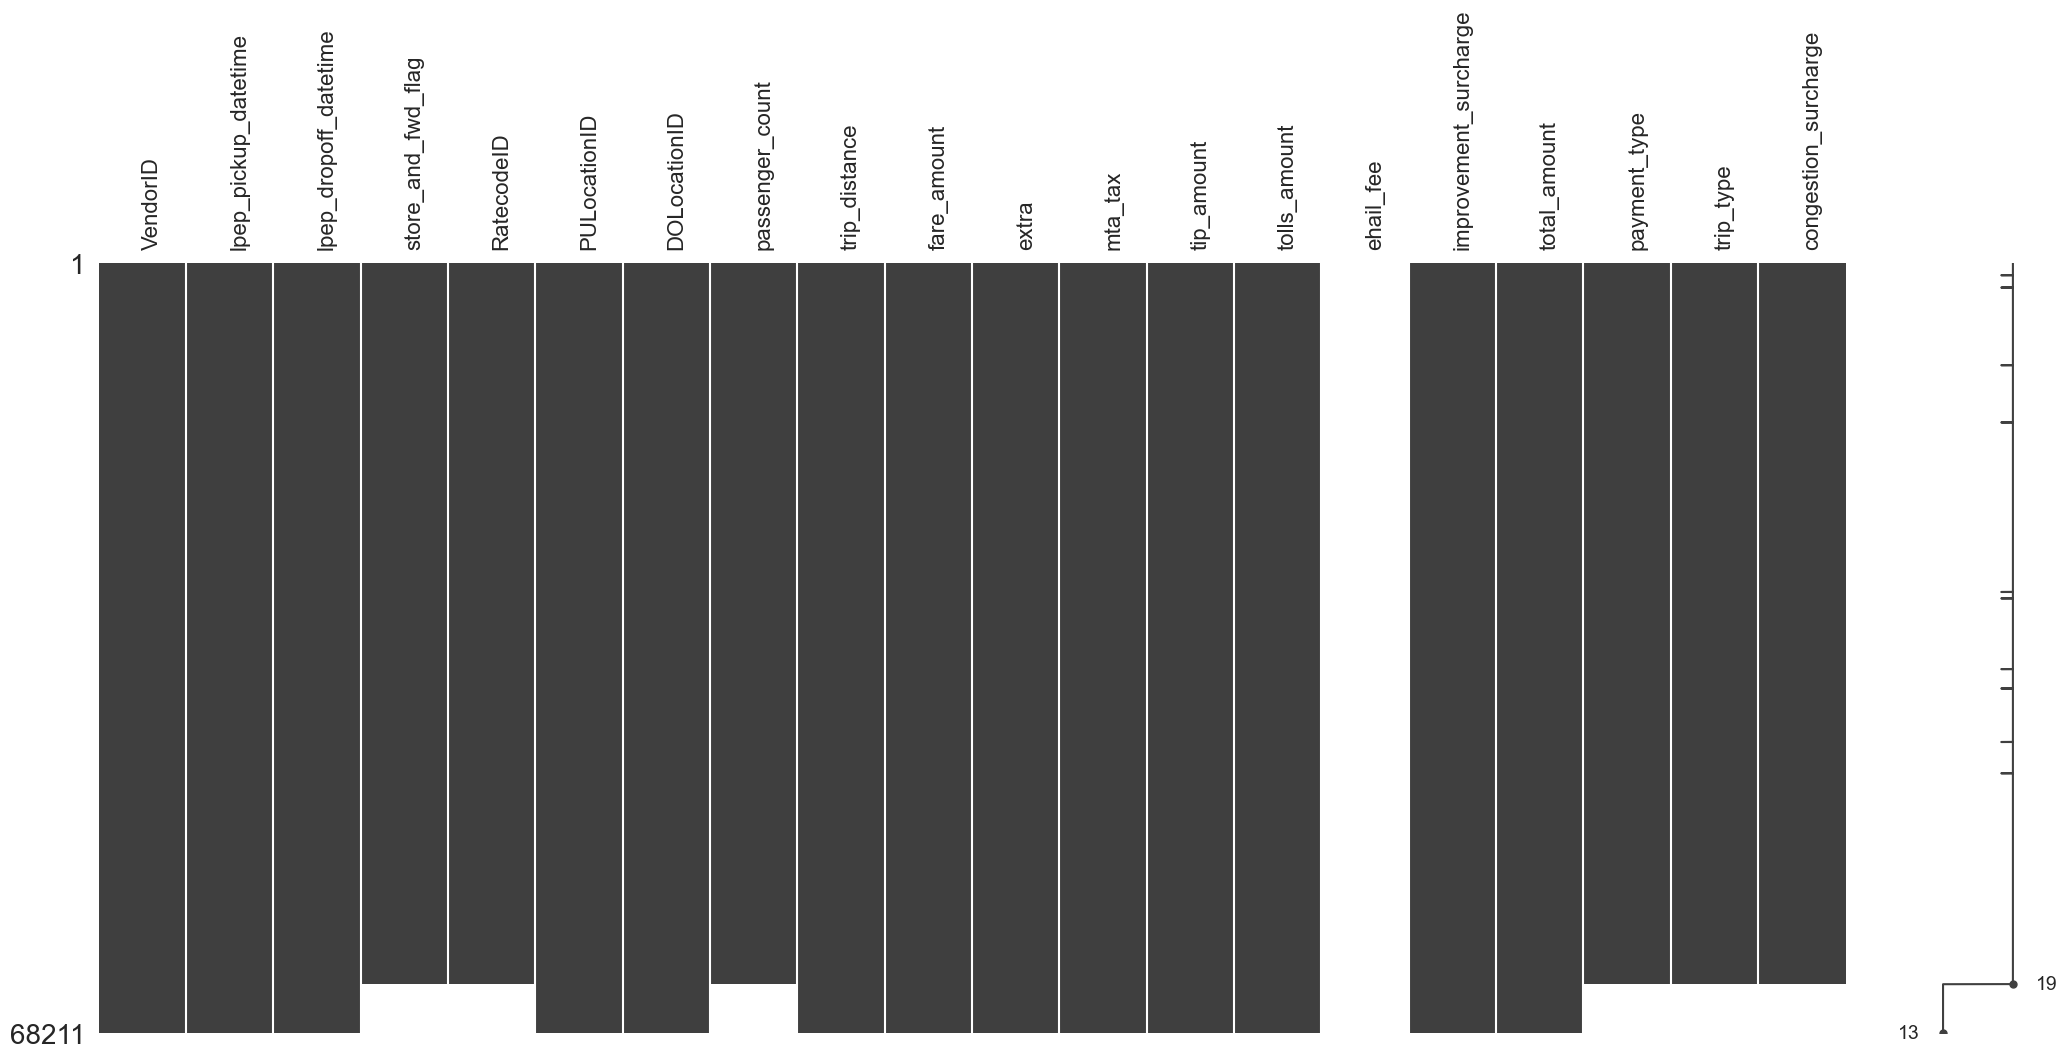

In [192]:
missingno.matrix(NYC_Taxi_Set_raw,label_rotation='90');

Terlihat bahwa missing value/data yang hilang pada setiap kolom berada pada baris terakhir, dan untuk kolom ***"ehail_fee"*** mempunyai missing value pada setiap baris maka dari itu, kolom ***"ehail_fee"*** akan saya hapus pada proses DataCleaning

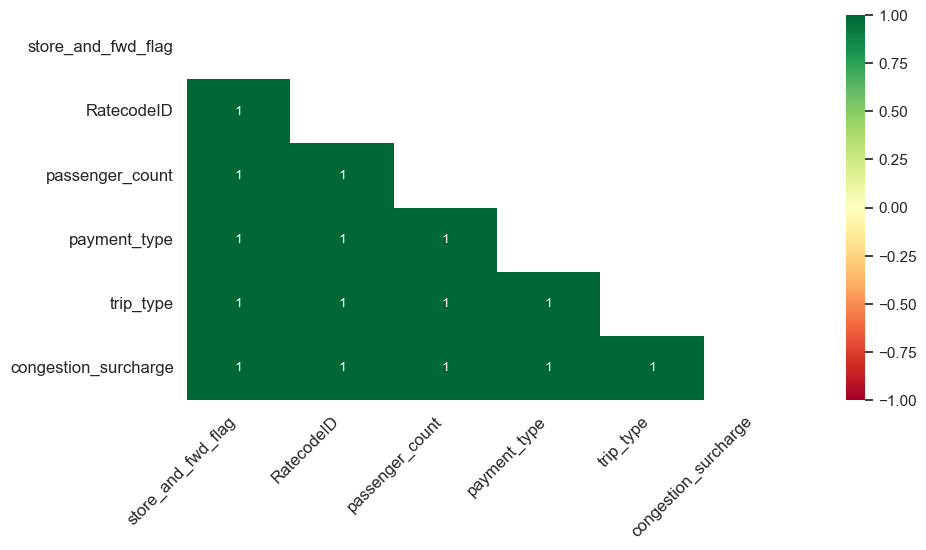

In [193]:
missingno.heatmap(NYC_Taxi_Set_raw, cmap="RdYlGn", figsize=(10,5), fontsize=12);

Di bawah ini kita memplot Heatmap yang menunjukkan korelasi nulitas antara berbagai kolom yang memiliki data yang hilang pada dataset kita.<br>

Korelasi nulitas berkisar dari -1 hingga 1.<br>

-1 - Korelasi Negatif yang menyatakan bahwa jika nilai satu variabel ada maka nilai variabel lain pasti tidak ada.<br>
0 - Tidak ada korelasi yang menyatakan bahwa nilai variabel yang ada atau tidak ada tidak berpengaruh satu sama lain.<br>
1 - Korelasi Positif yang menyatakan bahwa jika nilai satu variabel ada maka nilai yang lain pasti ada<br>


Maka yang saya simpulkan bahwa kolom yang berada digambar ini mempunyai korelasi positif yang kuat. Artinya jika satu variable ada maka nilai yang lain pasti ada

Secara ringkas, Saya bisa melihat bahwa:
- Dataset ***New York City TLC Trip Record*** memiliki yang bermula 20, akan tetapi karena saya melihat ada 2 kolom yang tidak dijelaskan dalam Data Dictionary yang saya dapatkan, yaitu ***"congestion_surcharge"***, ***"ehail_fee"***.<br>

- Beberapa kolom, yaitu ***"store_and_fwd_flag"***, ***"RatecodeID"***, ***"passenger_count"***, ***"ehail_fee"***, ***"payment_type"***, ***"trip_type"***, dan ***"congestion_surcharge"*** memiliki data kosong. Data kosong pada kolom-kolom tersebut diwakili dengan data NaN. Dimana Value NaN pada kolom ini bisa dipertimbangkan apakah perlu menghapus baris yang terdapat NaN pada kolom dibaris tersebut atau dibuatkan kategori baru.<br>

- Kolom ***"lpep_pickup_datetime"*** dan ***"lpep_dropoff_datetime"*** memiliki data bertipe object, yang dimana kolom ini berisi value datetime. Maka dari itu bisa saya ubah menjadi format Datetime<br>

- kolom ***"passenger_count"*** memiliki value 0.0. Dimana ini tidak masuk akal<br>

- Beberapa kolom, yaitu ***"RatecodeID"***, ***"passenger_count"***, ***"payment_type"***, dan ***"trip_type"*** memiliki format float atau object tapi valuenya berbentuk float. Maka dari itu, value tersebut bisa diubah tipe formatnya, ada yang menjadi int atau object.<br>

- Pada Kolom ***"store_and_fwd_flag"*** terdapat mixed type data format, Seharusnya hal yang wajar adalah menentukan 1 tipe data format yaitu Object.<br>

- Pada kolom ***"passanger_count"*** tedapat value 0.0, Yang mengindikasikan bahwa taxi ini tidak membawa penumpang. Maka dari itu saya akan exclude baris yang data passangernya 0, dikarena pada kasus ini saya hanya melakukan analisa yang hanya membawa penumpang saja..<br>

- Ada 336 perjalanan yang berasal dari 2 vendor yang tidak membawa penumpang atau menurut asumsi saya adalah mengantar barang, yaitu:<br>
              1 = Creative Mobile Technologies, LLC, Sebanyak 312<br>
              2 = VeriFone Inc, Sebanyak 24<br>

- Pada kolom ***"mta_tax"*** dan ***"improvement_surcharge"*** mempunyai nilai yang bervalue negatif, dikarena pada kolom ***"mta_tax"*** adalah pajak yang berjalan secara otomatis berdasarkan tarif meteran yang digunakan yang diberikan oleh **MTA (Metropolitan Transportation Authority)** dan ***"improvement_surcharge"*** adalah Biaya ekstra yang dikenakan pada perjalanan-perjalanan pendek. Berati tidak masuk akal jika value tersebut bernilai negatif, berati saya pastikan data tesebut terjadi kesalahan pada pengimputan data.

- Pada kolom RatecodeID terdapat value 99.0. Dimana value tidak memiliki pengertian, maka saya akan menghapusnya. Ada 2 alasan mengapa saya menghapusnya :<br>
            1. value 99.0 tidak memiliki penjalasan yang pasti.<br>
            2. pada kolom PULocationID	dan DOLocationID, saya tidak bisa menemukan refrensi data tersebut maka saya mengalami kesulitan melihat wilayah apa yang di rujuk oleh ID tersebut.<br>

---
### **Data Cleaning**

Setelah saya memahami data ini, saya akan memasuki tahap data cleaning. Dimana saya akan membersihkan data yang kotor ini menjadi bersih agar memudahkan saya menganalisa data perushaan ini.

- #### **Step 1**<br>

Pertama saya akan membuat salinan data kotor saya, dikarenakan saya ingin tetap mempunyai data yang asli.

In [194]:
NYC_Taxi_Set_Clean = NYC_Taxi_Set_raw.copy()
display(NYC_Taxi_Set_Clean.head(),NYC_Taxi_Set_Clean.tail())

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,1.0,0.5,4.03,0.0,NaN,1.0,24.18,1.0,1.0,2.75
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,1.0,0.5,2.64,0.0,NaN,1.0,15.84,1.0,1.0,0.00
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.2,1.0,0.5,1.94,0.0,NaN,1.0,11.64,1.0,1.0,0.00
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,0.5,1.5,1.70,0.0,NaN,1.0,10.20,1.0,1.0,0.00
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,0.5,1.5,0.00,0.0,NaN,1.0,8.00,1.0,1.0,0.00


,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
68206,2,2023-01-31 22:29:00,2023-01-31 22:42:00,NaN,NaN,49,62,NaN,4070.82,15.70,0.0,0.0,0.00,0.0,NaN,1.0,16.70,NaN,NaN,NaN
68207,2,2023-01-31 22:40:00,2023-01-31 22:48:00,NaN,NaN,10,205,NaN,2.14,4.41,0.0,0.0,0.00,0.0,NaN,1.0,5.41,NaN,NaN,NaN
68208,2,2023-01-31 23:46:00,2023-02-01 00:02:00,NaN,NaN,66,37,NaN,3.44,16.53,0.0,0.0,3.51,0.0,NaN,1.0,21.04,NaN,NaN,NaN
68209,2,2023-01-31 23:01:00,2023-01-31 23:19:00,NaN,NaN,225,189,NaN,3.03,14.98,0.0,0.0,3.20,0.0,NaN,1.0,19.18,NaN,NaN,NaN
68210,2,2023-01-31 23:51:00,2023-02-01 00:07:00,NaN,NaN,256,140,NaN,5.82,23.65,0.0,0.0,2.00,0.0,NaN,1.0,29.40,NaN,NaN,NaN


Setelah berhasil membuat data salinan, kemudian pada case 1 ini, saya akan menghapus kolom yang saya merasa kesulitan untuk memahami yaitu ***"congestion_surcharge"*** dan ***"ehail_fee"***. Dikarenakan pada kolom ini tidak dijelaskan oleh pemilik data tersebut, dan saya juga tidak ingin langsung mengartikan saja dari arti nama kolom tersebut tanpa mengetahui deskripsi kolom tersebut dengan jelas. Maka saya putuskan tidak akan memakainya.

In [195]:
NYC_Taxi_Set_Clean.drop(labels=['congestion_surcharge','ehail_fee'],axis=1,inplace=True)
display(NYC_Taxi_Set_Clean.head(),NYC_Taxi_Set_Clean.tail())

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,1.0,0.5,4.03,0.0,1.0,24.18,1.0,1.0
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,1.0,0.5,2.64,0.0,1.0,15.84,1.0,1.0
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.2,1.0,0.5,1.94,0.0,1.0,11.64,1.0,1.0
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,0.5,1.5,1.70,0.0,1.0,10.20,1.0,1.0
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,0.5,1.5,0.00,0.0,1.0,8.00,1.0,1.0


,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type
68206,2,2023-01-31 22:29:00,2023-01-31 22:42:00,NaN,NaN,49,62,NaN,4070.82,15.70,0.0,0.0,0.00,0.0,1.0,16.70,NaN,NaN
68207,2,2023-01-31 22:40:00,2023-01-31 22:48:00,NaN,NaN,10,205,NaN,2.14,4.41,0.0,0.0,0.00,0.0,1.0,5.41,NaN,NaN
68208,2,2023-01-31 23:46:00,2023-02-01 00:02:00,NaN,NaN,66,37,NaN,3.44,16.53,0.0,0.0,3.51,0.0,1.0,21.04,NaN,NaN
68209,2,2023-01-31 23:01:00,2023-01-31 23:19:00,NaN,NaN,225,189,NaN,3.03,14.98,0.0,0.0,3.20,0.0,1.0,19.18,NaN,NaN
68210,2,2023-01-31 23:51:00,2023-02-01 00:07:00,NaN,NaN,256,140,NaN,5.82,23.65,0.0,0.0,2.00,0.0,1.0,29.40,NaN,NaN


- #### **Step 2**<br>

Lalu, pada step ini saya akan melakukan penghapusan baris yang dimana valuenya adalah NaN pada kolom ***"store_and_fwd_flag"***, ***"RatecodeID"***, ***"passenger_count"***, ***"payment_type"***,dan ***"trip_type"***. Jumlah baris yang bervalue NaN tersebut berjumlah 4324 baris dan untuk kolom ***"trip_type"*** sendiri berjumlah 4334 baris. Pada kolom ini saya tidak dapat mengisi dengan value yang saya asumsikan maupun dengan value median/modus. Maka saya akan menghapus 4000+ baris tersebut yang menurut saya tidak akan mempengaruhi analisa saya. Karena hanya 6.34% saja dari 60000+ baris dimana terdapat nilai NaN pada 5 kolom tersebut.

In [196]:
NYC_Taxi_Set_Clean.dropna(subset=['store_and_fwd_flag', 'RatecodeID', 'passenger_count', 'payment_type', 'trip_type'], how='all', inplace=True)

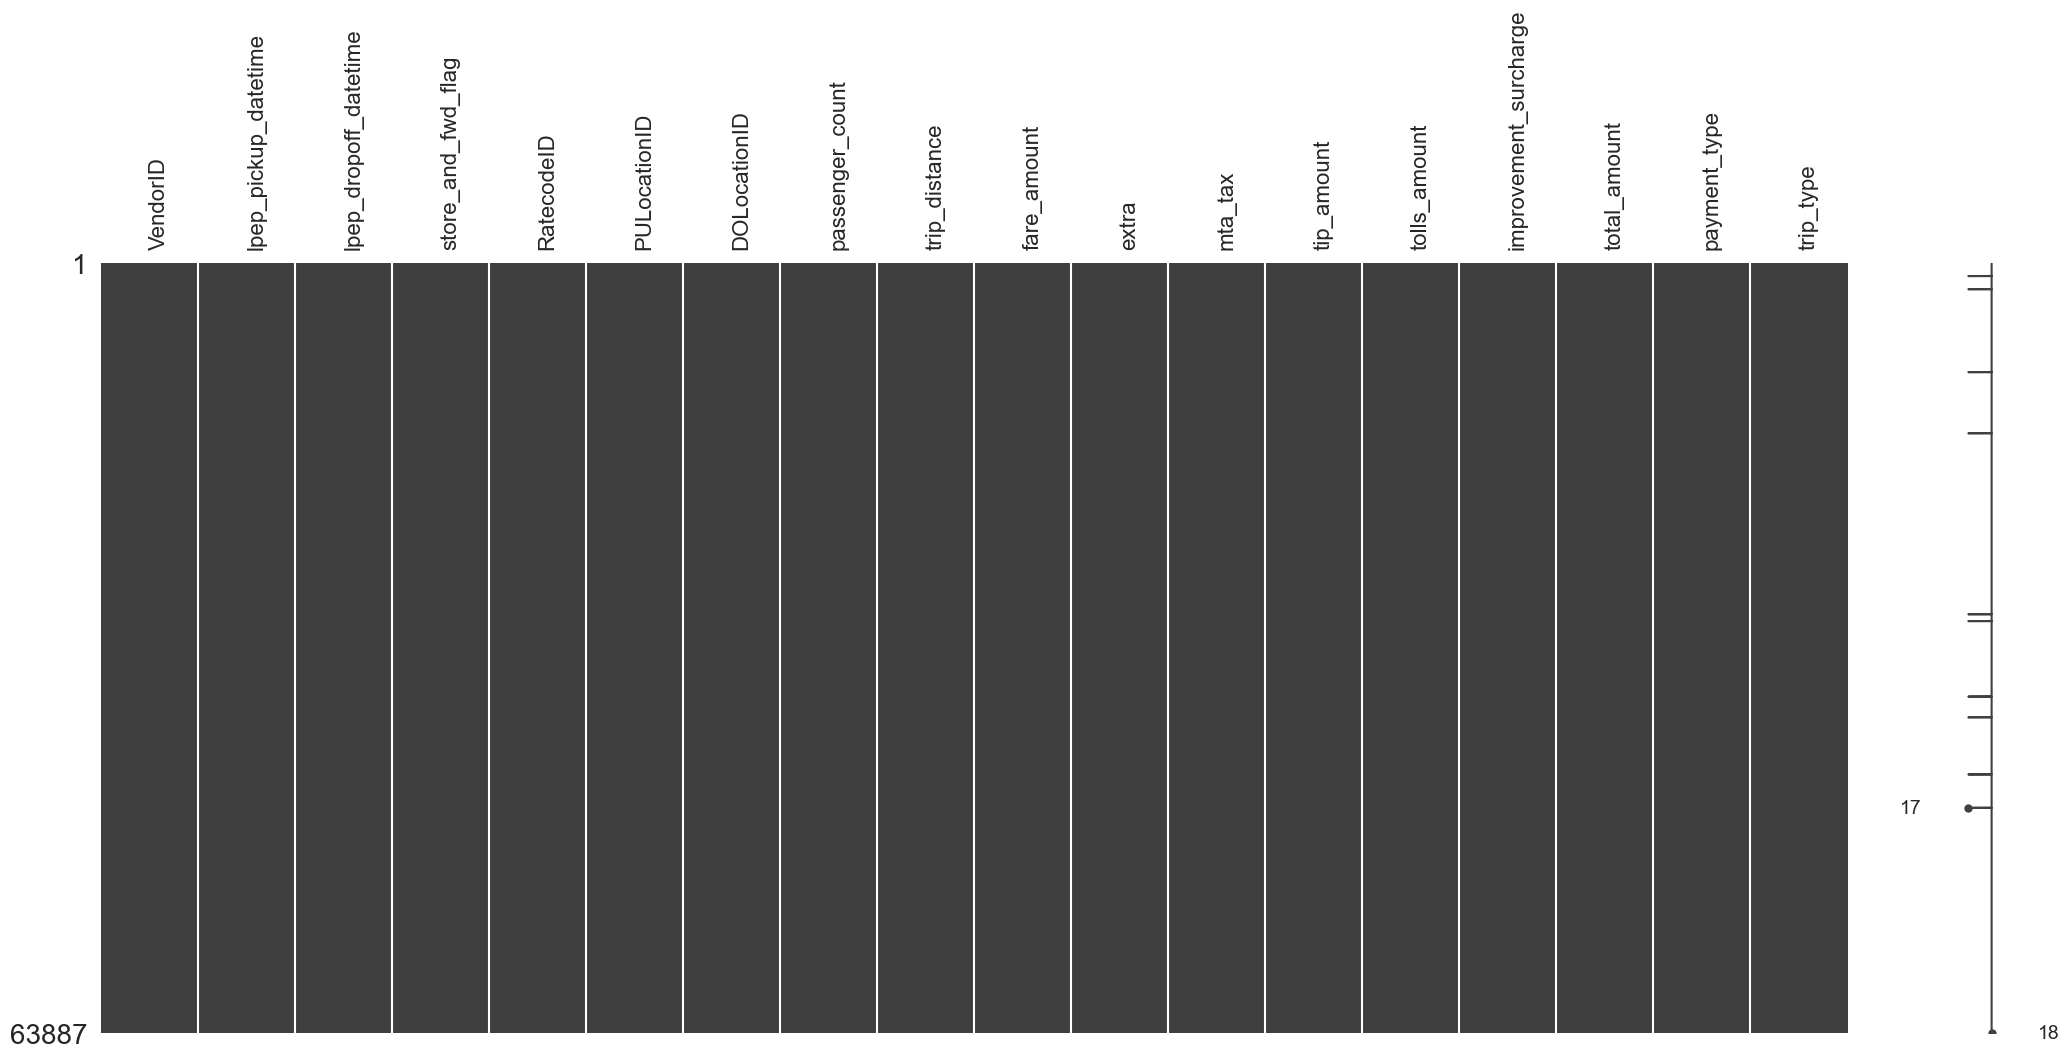

In [197]:
missingno.matrix(NYC_Taxi_Set_Clean,label_rotation='90');

In [198]:
pd.set_option('display.max_colwidth', None)
listItem = []
for col in NYC_Taxi_Set_Clean.columns:
    unique_values = NYC_Taxi_Set_Clean[col].nunique()
    if unique_values >= 20:
        listItem.append([col, NYC_Taxi_Set_Clean[col].dtype, NYC_Taxi_Set_Clean[col].isna().sum(), round((NYC_Taxi_Set_Clean[col].isna().sum()/len(NYC_Taxi_Set_Clean[col])) * 100,2),
                         unique_values, list(NYC_Taxi_Set_Clean[col].drop_duplicates().sample(20).values)]);
    else:
        listItem.append([col, NYC_Taxi_Set_Clean[col].dtype, NYC_Taxi_Set_Clean[col].isna().sum(), round((NYC_Taxi_Set_Clean[col].isna().sum()/len(NYC_Taxi_Set_Clean[col])) * 100,2),
                         unique_values, list(NYC_Taxi_Set_Clean[col].drop_duplicates().values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                      data=listItem)
dfDesc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,VendorID,int64,0,0.00,2,"[2, 1]"
1,lpep_pickup_datetime,object,0,0.00,62675,"[2023-01-18 23:16:07, 2023-01-04 16:19:42, 2023-01-30 00:04:59, 2023-01-01 14:36:37, 2023-01-13 09:20:17, 2023-01-25 13:51:00, 2023-01-16 19:09:52, 2023-01-22 01:41:24, 2023-01-14 19:32:29, 2023-01-26 13:24:04, 2023-01-14 20:52:49, 2023-01-21 03:30:29, 2023-01-10 17:37:21, 2023-01-24 16:08:52, 2023-01-29 20:34:50, 2023-01-09 09:23:08, 2023-01-12 00:50:33, 2023-01-30 06:55:34, 2023-01-31 11:54:12, 2023-01-14 09:27:31]"
2,lpep_dropoff_datetime,object,0,0.00,62612,"[2023-01-13 09:57:42, 2023-01-31 07:20:12, 2023-01-11 08:07:08, 2023-01-08 20:09:04, 2023-01-28 21:16:27, 2023-01-22 00:49:53, 2023-01-24 11:34:27, 2023-01-19 19:24:19, 2023-01-17 14:30:40, 2023-01-17 19:51:03, 2023-01-22 11:37:04, 2023-01-09 10:16:47, 2023-01-24 14:18:22, 2023-01-06 15:34:45, 2023-01-16 17:50:02, 2023-01-27 17:28:16, 2023-01-14 08:20:11, 2023-01-23 10:11:59, 2023-01-17 12:53:12, 2023-01-18 15:31:32]"
3,store_and_fwd_flag,object,0,0.00,2,"[N, Y]"
4,RatecodeID,float64,0,0.00,6,"[1.0, 5.0, 4.0, 3.0, 2.0, 99.0]"
5,PULocationID,int64,0,0.00,222,"[33, 186, 51, 32, 112, 29, 262, 260, 210, 45, 119, 129, 208, 234, 28, 255, 149, 143, 216, 124]"
6,DOLocationID,int64,0,0.00,248,"[49, 13, 87, 236, 128, 132, 234, 81, 40, 141, 194, 119, 123, 222, 120, 216, 9, 138, 25, 134]"
7,passenger_count,float64,0,0.00,10,"[1.0, 2.0, 4.0, 3.0, 6.0, 5.0, 0.0, 7.0, 9.0, 8.0]"
8,trip_distance,float64,0,0.00,1728,"[5.66, 12.9, 10.85, 6.5, 7.97, 6.28, 1.65, 1.66, 5.12, 5.29, 11.39, 13.3, 1.88, 3.38, 14.37, 17.95, 1.08, 7.86, 16.24, 13.93]"
9,fare_amount,float64,0,0.00,463,"[24.7, 122.7, 54.0, 15.8, 57.0, 16.5, -70.0, 14.9, 10.3, 27.2, 162.6, 144.4, 6.15, 26.8, 4.4, 119.2, 31.0, 25.91, 21.3, 295.0]"


Setelah berhasil menghapus baris yang mempunyai value NaN pada 5 kolom yaitu ***"store_and_fwd_flag"***, ***"RatecodeID"***, ***"passenger_count"***, ***"payment_type"***,dan ***"trip_type"***, yang dimana jumlah baris awalnya adalah 68211 menjadi 63887. Sekarang saya bisa melihat bahwa di visual matrix, terlihat setiap data sudah terisi semuanya. Akan tetapi jika saya melihat pada table summary, pada kolom terakhir yaitu ***"trip_type"*** mempunyai 10 baris yang nilainya masih NaN.

- #### **Step 3**<br>
Pada ***"trip_type"*** terdapat 10 baris yang masih mempunyai value NaN, saya akan melihat terlebih dahulu 10 baris tersebut. 

In [199]:
NYC_Taxi_Set_Clean[NYC_Taxi_Set_Clean['trip_type'].isna()]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type
1084,1,2023-01-01 19:44:13,2023-01-01 19:58:30,N,99.0,150,55,1.0,3.3,18.2,0.0,1.5,0.0,0.0,1.0,19.7,1.0,NaN
2174,1,2023-01-02 16:39:05,2023-01-02 17:31:42,N,99.0,73,82,1.0,3.7,23.5,0.0,1.5,0.0,0.0,1.0,25.0,1.0,NaN
9055,1,2023-01-05 20:33:45,2023-01-05 22:46:41,N,99.0,14,123,1.0,6.2,28.2,0.0,1.5,0.0,0.0,1.0,29.7,1.0,NaN
14125,1,2023-01-08 11:36:41,2023-01-08 12:14:59,N,99.0,61,77,1.0,2.7,22.5,0.0,1.5,0.0,0.0,1.0,24.0,1.0,NaN
29143,1,2023-01-15 13:51:42,2023-01-15 14:37:38,N,99.0,108,181,1.0,6.5,24.2,0.0,1.5,0.0,0.0,1.0,25.7,1.0,NaN
29711,1,2023-01-15 17:52:52,2023-01-15 22:11:55,N,99.0,150,123,1.0,1.6,15.2,0.0,1.5,0.0,0.0,1.0,16.7,1.0,NaN
35975,1,2023-01-19 01:07:59,2023-01-19 01:17:19,N,99.0,90,68,1.0,0.6,15.2,0.0,1.5,0.0,0.0,1.0,16.7,1.0,NaN
37691,1,2023-01-19 17:16:59,2023-01-19 22:29:53,N,99.0,265,123,1.0,14.6,40.2,0.0,1.5,0.0,0.0,1.0,41.7,1.0,NaN
42432,1,2023-01-21 20:29:58,2023-01-22 02:59:25,N,99.0,150,123,1.0,1.4,15.2,0.0,1.5,0.0,0.0,1.0,16.7,1.0,NaN
45204,1,2023-01-23 13:45:11,2023-01-23 23:36:42,N,99.0,244,248,1.0,28.3,50.2,0.0,1.5,0.0,0.0,1.0,51.7,1.0,NaN


Setelah saya melihat, ternyata baris yang mempunyai value NaN pada kolom ***"trip_type"*** adalah baris yang dimiliki oleh kolom ***"RatecodeID"*** yang mempunyai value 99.0. Maka saya akan drop baris ini, sebab informasi yang saya butuhkan untuk menganti value RatecodeID tersebut tidak memadai. Karena Saya tidak menemukan refrensi Location apa yang mewakili ID tersebut pada kolom ***PULocationID*** dan ***DOLocationID***.

In [200]:
NYC_Taxi_Set_Clean.dropna(subset=['trip_type'],inplace=True)

In [201]:
pd.set_option('display.max_colwidth', None)
listItem = []
for col in NYC_Taxi_Set_Clean.columns:
    unique_values = NYC_Taxi_Set_Clean[col].nunique()
    if unique_values >= 20:
        listItem.append([col, NYC_Taxi_Set_Clean[col].dtype, NYC_Taxi_Set_Clean[col].isna().sum(), round((NYC_Taxi_Set_Clean[col].isna().sum()/len(NYC_Taxi_Set_Clean[col])) * 100,2),
                         unique_values, list(NYC_Taxi_Set_Clean[col].drop_duplicates().sample(20).values)]);
    else:
        listItem.append([col, NYC_Taxi_Set_Clean[col].dtype, NYC_Taxi_Set_Clean[col].isna().sum(), round((NYC_Taxi_Set_Clean[col].isna().sum()/len(NYC_Taxi_Set_Clean[col])) * 100,2),
                         unique_values, list(NYC_Taxi_Set_Clean[col].drop_duplicates().values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                      data=listItem)
dfDesc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,VendorID,int64,0,0.0,2,"[2, 1]"
1,lpep_pickup_datetime,object,0,0.0,62665,"[2023-01-06 17:59:27, 2023-01-10 06:56:23, 2023-01-10 07:33:29, 2023-01-17 21:02:47, 2023-01-11 11:08:55, 2023-01-28 09:13:38, 2023-01-23 15:49:51, 2023-01-31 09:30:45, 2023-01-27 16:12:19, 2023-01-30 09:02:19, 2023-01-16 07:17:29, 2023-01-03 19:05:58, 2023-01-16 15:43:41, 2023-01-11 12:53:42, 2023-01-08 16:24:18, 2023-01-15 01:10:37, 2023-01-07 15:35:31, 2023-01-27 16:29:25, 2023-01-12 19:09:10, 2023-01-28 16:29:12]"
2,lpep_dropoff_datetime,object,0,0.0,62602,"[2023-01-17 17:53:29, 2023-01-16 09:26:46, 2023-01-05 09:26:57, 2023-01-26 08:33:03, 2023-01-22 16:10:25, 2023-01-27 06:43:55, 2023-01-27 14:47:03, 2023-01-18 18:10:38, 2023-01-02 19:46:09, 2023-01-25 21:45:45, 2023-01-08 12:52:48, 2023-01-09 08:57:36, 2023-01-01 03:30:44, 2023-01-26 09:47:06, 2023-01-09 16:18:05, 2023-01-13 13:18:08, 2023-01-12 08:42:57, 2023-01-03 16:04:30, 2023-01-21 11:17:27, 2023-01-21 12:19:05]"
3,store_and_fwd_flag,object,0,0.0,2,"[N, Y]"
4,RatecodeID,float64,0,0.0,5,"[1.0, 5.0, 4.0, 3.0, 2.0]"
5,PULocationID,int64,0,0.0,222,"[121, 64, 21, 171, 95, 49, 239, 47, 127, 53, 238, 242, 89, 230, 219, 126, 19, 247, 123, 254]"
6,DOLocationID,int64,0,0.0,248,"[39, 192, 1, 210, 226, 53, 160, 247, 163, 27, 225, 148, 107, 19, 34, 7, 258, 183, 72, 260]"
7,passenger_count,float64,0,0.0,10,"[1.0, 2.0, 4.0, 3.0, 6.0, 5.0, 0.0, 7.0, 9.0, 8.0]"
8,trip_distance,float64,0,0.0,1727,"[1.6, 1.84, 4.17, 16.22, 10.68, 13.34, 19.7, 0.71, 29.38, 7.45, 3.82, 11.42, 7.54, 18.06, 2.94, 13.47, 13.13, 8.79, 16.1, 8.62]"
9,fare_amount,float64,0,0.0,463,"[24.5, 162.6, 27.2, 8.08, -21.0, 133.9, 25.8, 27.06, 26.87, 67.4, 89.8, 51.5, 149.3, 65.5, 118.5, 24.7, 61.8, -7.9, 9.0, 74.5]"


Setelah berhasil menghapus baris tersebut, sekarang baris yang saya miliki berjumlah 63877.

- #### **Step 4**<br>

Setelah kita sudah membersihkan kolom yang mempunyai NaN, Sekarang saya akan melihat adakah kolom yang dimana kolom formatnya tidak sesuai.
Saya akan lihat kembali table summary saya.

In [202]:
pd.set_option('display.max_colwidth', None)
listItem = []
for col in NYC_Taxi_Set_Clean.columns:
    unique_values = NYC_Taxi_Set_Clean[col].nunique()
    if unique_values >= 20:
        listItem.append([col, NYC_Taxi_Set_Clean[col].dtype, NYC_Taxi_Set_Clean[col].isna().sum(), round((NYC_Taxi_Set_Clean[col].isna().sum()/len(NYC_Taxi_Set_Clean[col])) * 100,2),
                         unique_values, list(NYC_Taxi_Set_Clean[col].drop_duplicates().sample(20).values)]);
    else:
        listItem.append([col, NYC_Taxi_Set_Clean[col].dtype, NYC_Taxi_Set_Clean[col].isna().sum(), round((NYC_Taxi_Set_Clean[col].isna().sum()/len(NYC_Taxi_Set_Clean[col])) * 100,2),
                         unique_values, list(NYC_Taxi_Set_Clean[col].drop_duplicates().values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                      data=listItem)
dfDesc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,VendorID,int64,0,0.0,2,"[2, 1]"
1,lpep_pickup_datetime,object,0,0.0,62665,"[2023-01-06 15:36:40, 2023-01-05 15:37:33, 2023-01-23 19:05:29, 2023-01-06 10:16:42, 2023-01-07 15:48:28, 2023-01-01 20:45:27, 2023-01-28 21:21:26, 2023-01-06 13:03:33, 2023-01-31 09:57:13, 2023-01-15 10:53:20, 2023-01-09 12:41:34, 2023-01-30 10:42:39, 2023-01-01 16:36:15, 2023-01-05 11:52:39, 2023-01-10 16:00:40, 2023-01-07 19:18:49, 2023-01-30 18:23:43, 2023-01-06 10:48:16, 2023-01-09 11:36:42, 2023-01-06 08:14:36]"
2,lpep_dropoff_datetime,object,0,0.0,62602,"[2023-01-31 10:21:30, 2023-01-26 22:25:29, 2023-01-17 20:11:37, 2023-01-24 07:24:51, 2023-01-10 21:48:30, 2023-01-07 22:08:45, 2023-01-05 20:43:03, 2023-01-20 17:32:09, 2023-01-23 14:28:09, 2023-01-11 09:37:52, 2023-01-23 16:16:25, 2023-01-11 14:44:54, 2023-01-24 08:01:15, 2023-01-11 11:03:35, 2023-01-19 09:56:27, 2023-01-04 15:27:18, 2023-01-07 17:20:49, 2023-01-13 18:57:09, 2023-01-02 20:10:34, 2023-01-02 15:33:55]"
3,store_and_fwd_flag,object,0,0.0,2,"[N, Y]"
4,RatecodeID,float64,0,0.0,5,"[1.0, 5.0, 4.0, 3.0, 2.0]"
5,PULocationID,int64,0,0.0,222,"[53, 213, 127, 208, 7, 122, 1, 123, 146, 113, 76, 55, 22, 73, 47, 198, 132, 169, 91, 130]"
6,DOLocationID,int64,0,0.0,248,"[142, 154, 52, 22, 203, 234, 214, 206, 69, 85, 230, 112, 166, 126, 7, 186, 196, 162, 208, 123]"
7,passenger_count,float64,0,0.0,10,"[1.0, 2.0, 4.0, 3.0, 6.0, 5.0, 0.0, 7.0, 9.0, 8.0]"
8,trip_distance,float64,0,0.0,1727,"[11.92, 4.34, 1571.97, 10.27, 13.49, 4.84, 8.73, 15.71, 4.72, 12.59, 0.32, 24.27, 15.84, 8.77, 1.41, 12.53, 16.87, 17.51, 24.49, 3.71]"
9,fare_amount,float64,0,0.0,463,"[16.06, 14.7, 21.5, 24.23, 73.0, 19.8, 12.21, 15.5, 12.2, 119.2, -4.4, -6.5, 40.1, 3.0, 6.0, 27.0, 37.7, 45.5, 51.0, 35.9]"


Pada Step 4, saya akan memperbaiki format kolom ***"lpep_pickup_datetime"*** & ***"lpep_dropoff_datetime"*** yang bermula formatnya object menjadi datetime.

In [203]:
NYC_Taxi_Set_Clean['lpep_pickup_datetime'] = pd.to_datetime(NYC_Taxi_Set_Clean['lpep_pickup_datetime'], format='%Y-%m-%d %H:%M:%S')
NYC_Taxi_Set_Clean['lpep_dropoff_datetime'] = pd.to_datetime(NYC_Taxi_Set_Clean['lpep_dropoff_datetime'], format='%Y-%m-%d %H:%M:%S')

In [204]:
pd.set_option('display.max_colwidth', None)
listItem = []
for col in NYC_Taxi_Set_Clean.columns:
    unique_values = NYC_Taxi_Set_Clean[col].nunique()
    if unique_values >= 20:
        listItem.append([col, NYC_Taxi_Set_Clean[col].dtype, NYC_Taxi_Set_Clean[col].isna().sum(), round((NYC_Taxi_Set_Clean[col].isna().sum()/len(NYC_Taxi_Set_Clean[col])) * 100,2),
                         unique_values, list(NYC_Taxi_Set_Clean[col].drop_duplicates().sample(20).values)]);
    else:
        listItem.append([col, NYC_Taxi_Set_Clean[col].dtype, NYC_Taxi_Set_Clean[col].isna().sum(), round((NYC_Taxi_Set_Clean[col].isna().sum()/len(NYC_Taxi_Set_Clean[col])) * 100,2),
                         unique_values, list(NYC_Taxi_Set_Clean[col].drop_duplicates().values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                      data=listItem)
dfDesc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,VendorID,int64,0,0.0,2,"[2, 1]"
1,lpep_pickup_datetime,datetime64[ns],0,0.0,62665,"[2023-01-21T19:28:09.000000000, 2023-01-19T16:22:25.000000000, 2023-01-07T13:00:46.000000000, 2023-01-08T13:32:48.000000000, 2023-01-27T20:58:22.000000000, 2023-01-04T19:53:25.000000000, 2023-01-11T09:33:54.000000000, 2023-01-12T16:42:17.000000000, 2023-01-16T17:20:27.000000000, 2023-01-26T23:02:11.000000000, 2023-01-09T16:06:05.000000000, 2023-01-02T01:01:04.000000000, 2023-01-20T17:31:33.000000000, 2023-01-23T10:52:22.000000000, 2023-01-06T18:53:33.000000000, 2023-01-03T22:28:10.000000000, 2023-01-05T14:26:36.000000000, 2023-01-03T17:15:58.000000000, 2023-01-06T19:07:56.000000000, 2023-01-01T00:18:35.000000000]"
2,lpep_dropoff_datetime,datetime64[ns],0,0.0,62602,"[2023-01-11T13:48:38.000000000, 2023-01-20T14:55:14.000000000, 2023-01-19T17:43:45.000000000, 2023-01-20T22:22:23.000000000, 2023-01-02T19:31:40.000000000, 2023-01-17T13:46:34.000000000, 2023-01-21T17:09:01.000000000, 2023-01-13T17:03:55.000000000, 2023-01-29T18:38:21.000000000, 2023-01-12T18:02:09.000000000, 2023-01-13T22:47:00.000000000, 2023-01-14T12:25:31.000000000, 2023-01-23T19:27:26.000000000, 2023-01-30T11:43:47.000000000, 2023-01-23T09:30:49.000000000, 2023-01-08T16:25:49.000000000, 2023-01-18T17:06:40.000000000, 2023-01-28T13:41:52.000000000, 2023-01-14T15:19:19.000000000, 2023-01-22T16:56:31.000000000]"
3,store_and_fwd_flag,object,0,0.0,2,"[N, Y]"
4,RatecodeID,float64,0,0.0,5,"[1.0, 5.0, 4.0, 3.0, 2.0]"
5,PULocationID,int64,0,0.0,222,"[258, 201, 265, 177, 250, 94, 218, 244, 209, 200, 149, 119, 74, 145, 9, 3, 42, 153, 238, 206]"
6,DOLocationID,int64,0,0.0,248,"[82, 101, 244, 16, 76, 254, 264, 232, 208, 182, 148, 91, 9, 259, 38, 127, 224, 214, 159, 133]"
7,passenger_count,float64,0,0.0,10,"[1.0, 2.0, 4.0, 3.0, 6.0, 5.0, 0.0, 7.0, 9.0, 8.0]"
8,trip_distance,float64,0,0.0,1727,"[3.23, 6.62, 7.45, 5.97, 13.42, 13.06, 13.81, 9.47, 22.37, 11.68, 6.06, 15.06, 8.05, 8.11, 11.25, 7.58, 1.63, 8.41, 0.52, 6.53]"
9,fare_amount,float64,0,0.0,463,"[15.45, 74.8, -4.0, 122.4, 70.9, 52.5, 61.5, 10.7, 25.91, 36.0, -4.5, 22.5, 84.9, 15.0, 9.5, 97.5, 45.0, 350.0, 15.55, -21.0]"


- #### **Step 5**<br>

Setelah step 4 berhasil, sekarang saya melihat format pada kolom ***"RatecodeID"***, ***"passenger_count"***, ***"payment_type"***, dan ***"trip_type"*** bertipe float. Dimana tipe tersebut tidak cocok pada 4 kolom ini, dikarenakan kolom tesebut merupakan nilai yang bulat  dan ada yang valuenya mewakili sebuah kategori. Maka saya menganti value tersebut menjadi int.

In [205]:
NYC_Taxi_Set_Clean[['RatecodeID', 'passenger_count', 'payment_type', 'trip_type']] = NYC_Taxi_Set_Clean[['RatecodeID', 'passenger_count', 'payment_type', 'trip_type']].astype(int)


In [206]:
pd.set_option('display.max_colwidth', None)
listItem = []
for col in NYC_Taxi_Set_Clean.columns:
    unique_values = NYC_Taxi_Set_Clean[col].nunique()
    if unique_values >= 20:
        listItem.append([col, NYC_Taxi_Set_Clean[col].dtype, NYC_Taxi_Set_Clean[col].isna().sum(), round((NYC_Taxi_Set_Clean[col].isna().sum()/len(NYC_Taxi_Set_Clean[col])) * 100,2),
                         unique_values, list(NYC_Taxi_Set_Clean[col].drop_duplicates().sample(20).values)]);
    else:
        listItem.append([col, NYC_Taxi_Set_Clean[col].dtype, NYC_Taxi_Set_Clean[col].isna().sum(), round((NYC_Taxi_Set_Clean[col].isna().sum()/len(NYC_Taxi_Set_Clean[col])) * 100,2),
                         unique_values, list(NYC_Taxi_Set_Clean[col].drop_duplicates().values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                      data=listItem)
dfDesc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,VendorID,int64,0,0.0,2,"[2, 1]"
1,lpep_pickup_datetime,datetime64[ns],0,0.0,62665,"[2023-01-25T19:56:38.000000000, 2023-01-24T09:12:56.000000000, 2023-01-19T14:42:38.000000000, 2023-01-14T02:05:52.000000000, 2023-01-03T12:09:54.000000000, 2023-01-03T08:58:45.000000000, 2023-01-18T21:34:59.000000000, 2023-01-06T15:52:16.000000000, 2023-01-04T17:14:10.000000000, 2023-01-24T14:12:06.000000000, 2023-01-29T00:25:57.000000000, 2023-01-19T16:05:36.000000000, 2023-01-08T22:30:49.000000000, 2023-01-27T21:37:20.000000000, 2023-01-09T03:58:41.000000000, 2023-01-18T20:13:47.000000000, 2023-01-13T18:19:22.000000000, 2023-01-14T21:01:13.000000000, 2023-01-05T00:55:34.000000000, 2023-01-23T17:01:24.000000000]"
2,lpep_dropoff_datetime,datetime64[ns],0,0.0,62602,"[2023-01-02T11:13:39.000000000, 2023-01-24T22:01:34.000000000, 2023-01-11T11:34:28.000000000, 2023-01-05T14:41:42.000000000, 2023-01-29T16:08:37.000000000, 2023-01-25T21:38:41.000000000, 2023-01-10T23:48:28.000000000, 2023-01-23T15:17:25.000000000, 2023-01-27T12:11:39.000000000, 2023-01-09T14:33:16.000000000, 2023-01-26T11:02:01.000000000, 2023-01-24T10:42:35.000000000, 2023-01-12T16:18:18.000000000, 2023-01-15T13:54:20.000000000, 2023-01-24T10:13:36.000000000, 2023-01-05T19:47:39.000000000, 2023-01-22T14:12:22.000000000, 2023-01-21T15:28:57.000000000, 2023-01-09T00:11:50.000000000, 2023-01-23T20:58:22.000000000]"
3,store_and_fwd_flag,object,0,0.0,2,"[N, Y]"
4,RatecodeID,int32,0,0.0,5,"[1, 5, 4, 3, 2]"
5,PULocationID,int64,0,0.0,222,"[47, 56, 235, 253, 190, 10, 136, 216, 227, 81, 73, 260, 64, 134, 45, 169, 238, 90, 16, 69]"
6,DOLocationID,int64,0,0.0,248,"[124, 122, 194, 254, 183, 107, 65, 131, 75, 59, 40, 26, 172, 198, 24, 11, 184, 263, 85, 155]"
7,passenger_count,int32,0,0.0,10,"[1, 2, 4, 3, 6, 5, 0, 7, 9, 8]"
8,trip_distance,float64,0,0.0,1727,"[6.51, 10.76, 17.22, 8.75, 16.54, 8.03, 8.33, 3.73, 6.29, 0.83, 9.21, 8.19, 3.33, 0.36, 5.24, 5.76, 12.85, 6.39, 18.15, 16.18]"
9,fare_amount,float64,0,0.0,463,"[17.77, 42.0, 66.7, 22.2, 70.9, 105.2, -2.5, 17.0, 45.7, 100.0, 28.2, 58.0, 49.5, 89.8, 29.97, 28.9, 60.0, 28.46, 150.7, 51.0]"


- ### **Step 6**

Saya akan melihat apakah dari kolom ***"fare_amount"***, ***"extra"***, ***"mta_tax"***, ***"tip_amount"***, ***"tolls_amount"***, ***"improvement_surcharge"***, dan ***"total_amount"*** terdapat nilai negatif. Dikarena jika ada suatu value dengan negatif itu adalah hal yang tidak wajar dan saya simpulkan adalah terjadi kesalahan input atau kesalahan pada sistem

In [207]:
NYC_Taxi_Set_Clean[NYC_Taxi_Set_Clean['fare_amount']<0]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type
662,2,2023-01-01 14:58:13,2023-01-01 14:58:39,N,1,75,74,2,0.17,-3.0,0.0,-0.5,0.0,0.0,-1.0,-4.5,3,1
898,2,2023-01-01 17:24:52,2023-01-01 17:25:12,N,1,193,193,1,0.00,-3.0,0.0,-0.5,0.0,0.0,-1.0,-4.5,4,1
1317,2,2023-01-02 02:05:08,2023-01-02 02:12:57,N,1,129,82,1,0.64,-8.6,-1.0,-0.5,0.0,0.0,-1.0,-11.1,3,1
1686,2,2023-01-02 12:56:53,2023-01-02 13:00:10,N,1,75,75,1,0.77,-4.5,0.0,-0.5,0.0,0.0,-0.3,-5.3,4,1
1864,2,2023-01-02 13:51:33,2023-01-02 13:52:42,N,1,75,75,2,0.08,-3.7,0.0,-0.5,0.0,0.0,-1.0,-5.2,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63358,2,2023-01-31 18:39:16,2023-01-31 18:39:29,N,1,130,130,3,0.05,-3.0,-2.5,-0.5,0.0,0.0,-1.0,-7.0,4,1
63544,2,2023-01-31 19:06:18,2023-01-31 19:06:46,N,1,75,75,2,0.08,-3.0,-2.5,-0.5,0.0,0.0,-1.0,-7.0,3,1
63655,2,2023-01-31 20:29:00,2023-01-31 20:29:14,N,1,74,74,1,0.00,-2.5,-0.5,-0.5,0.0,0.0,-0.3,-3.8,3,1
63807,2,2023-01-31 22:44:16,2023-01-31 22:45:18,N,1,256,256,1,0.15,-3.7,-1.0,-0.5,0.0,0.0,-1.0,-6.2,3,1


In [208]:
NYC_Taxi_Set_Clean[NYC_Taxi_Set_Clean['extra']<0]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type
1317,2,2023-01-02 02:05:08,2023-01-02 02:12:57,N,1,129,82,1,0.64,-8.6,-1.0,-0.5,0.0,0.0,-1.0,-11.1,3,1
5980,2,2023-01-04 16:13:03,2023-01-04 16:15:30,N,1,95,95,5,0.22,-4.4,-2.5,-0.5,0.0,0.0,-1.0,-8.4,3,1
6168,2,2023-01-04 17:38:20,2023-01-04 17:39:14,N,1,74,74,1,0.10,-3.0,-2.5,-0.5,0.0,0.0,-1.0,-7.0,3,1
6329,2,2023-01-04 17:06:10,2023-01-04 17:11:35,N,1,42,74,1,0.75,-7.2,-2.5,-0.5,0.0,0.0,-1.0,-11.2,3,1
6501,2,2023-01-04 18:35:37,2023-01-04 18:36:08,N,1,74,74,1,0.00,-3.0,-2.5,-0.5,0.0,0.0,-1.0,-7.0,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63240,2,2023-01-31 18:11:43,2023-01-31 18:12:13,N,1,193,193,1,0.00,-3.0,-2.5,-0.5,0.0,0.0,-1.0,-7.0,3,1
63358,2,2023-01-31 18:39:16,2023-01-31 18:39:29,N,1,130,130,3,0.05,-3.0,-2.5,-0.5,0.0,0.0,-1.0,-7.0,4,1
63544,2,2023-01-31 19:06:18,2023-01-31 19:06:46,N,1,75,75,2,0.08,-3.0,-2.5,-0.5,0.0,0.0,-1.0,-7.0,3,1
63655,2,2023-01-31 20:29:00,2023-01-31 20:29:14,N,1,74,74,1,0.00,-2.5,-0.5,-0.5,0.0,0.0,-0.3,-3.8,3,1


In [209]:
NYC_Taxi_Set_Clean[NYC_Taxi_Set_Clean['mta_tax']<0]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type
662,2,2023-01-01 14:58:13,2023-01-01 14:58:39,N,1,75,74,2,0.17,-3.0,0.0,-0.5,0.0,0.0,-1.0,-4.5,3,1
898,2,2023-01-01 17:24:52,2023-01-01 17:25:12,N,1,193,193,1,0.00,-3.0,0.0,-0.5,0.0,0.0,-1.0,-4.5,4,1
1317,2,2023-01-02 02:05:08,2023-01-02 02:12:57,N,1,129,82,1,0.64,-8.6,-1.0,-0.5,0.0,0.0,-1.0,-11.1,3,1
1686,2,2023-01-02 12:56:53,2023-01-02 13:00:10,N,1,75,75,1,0.77,-4.5,0.0,-0.5,0.0,0.0,-0.3,-5.3,4,1
1864,2,2023-01-02 13:51:33,2023-01-02 13:52:42,N,1,75,75,2,0.08,-3.7,0.0,-0.5,0.0,0.0,-1.0,-5.2,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63240,2,2023-01-31 18:11:43,2023-01-31 18:12:13,N,1,193,193,1,0.00,-3.0,-2.5,-0.5,0.0,0.0,-1.0,-7.0,3,1
63358,2,2023-01-31 18:39:16,2023-01-31 18:39:29,N,1,130,130,3,0.05,-3.0,-2.5,-0.5,0.0,0.0,-1.0,-7.0,4,1
63544,2,2023-01-31 19:06:18,2023-01-31 19:06:46,N,1,75,75,2,0.08,-3.0,-2.5,-0.5,0.0,0.0,-1.0,-7.0,3,1
63655,2,2023-01-31 20:29:00,2023-01-31 20:29:14,N,1,74,74,1,0.00,-2.5,-0.5,-0.5,0.0,0.0,-0.3,-3.8,3,1


In [210]:
NYC_Taxi_Set_Clean[NYC_Taxi_Set_Clean['tip_amount']<0]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type
3409,2,2023-01-03 11:43:10,2023-01-03 11:43:25,N,1,193,193,1,0.0,-3.0,0.0,-0.5,-0.90,0.0,-1.0,-5.40,3,1
7793,2,2023-01-05 12:33:18,2023-01-05 12:33:26,N,1,193,193,1,0.0,-3.0,0.0,-0.5,-0.90,0.0,-1.0,-5.40,3,1
8107,2,2023-01-05 15:23:14,2023-01-05 15:23:27,N,1,193,193,1,0.0,-3.0,0.0,-0.5,-0.01,0.0,-1.0,-4.51,3,1
10336,2,2023-01-06 14:54:21,2023-01-06 14:55:50,N,1,193,193,1,0.0,-3.7,0.0,-0.5,-0.13,0.0,-1.0,-5.33,3,1
14707,2,2023-01-08 16:49:17,2023-01-08 16:49:20,N,1,61,61,1,0.0,-3.0,0.0,-0.5,-10.50,0.0,-1.0,-15.00,4,1
18003,2,2023-01-10 11:30:17,2023-01-10 11:32:09,N,1,193,193,1,0.0,-3.7,0.0,-0.5,-0.01,0.0,-1.0,-5.21,3,1
30874,2,2023-01-16 14:03:29,2023-01-16 14:03:56,N,1,193,193,1,0.0,-3.0,0.0,-0.5,-0.90,0.0,-1.0,-5.40,3,1
37071,2,2023-01-19 14:27:07,2023-01-19 14:27:29,N,1,193,193,1,0.0,-3.0,0.0,-0.5,-0.90,0.0,-1.0,-5.40,3,1
56495,2,2023-01-28 09:33:22,2023-01-28 09:34:00,N,1,193,193,2,0.0,-3.0,0.0,-0.5,-0.90,0.0,-1.0,-5.40,3,1


In [211]:
NYC_Taxi_Set_Clean[NYC_Taxi_Set_Clean['tolls_amount']<0]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type


In [212]:
NYC_Taxi_Set_Clean[NYC_Taxi_Set_Clean['improvement_surcharge']<0]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type
662,2,2023-01-01 14:58:13,2023-01-01 14:58:39,N,1,75,74,2,0.17,-3.0,0.0,-0.5,0.0,0.0,-1.0,-4.5,3,1
898,2,2023-01-01 17:24:52,2023-01-01 17:25:12,N,1,193,193,1,0.00,-3.0,0.0,-0.5,0.0,0.0,-1.0,-4.5,4,1
1317,2,2023-01-02 02:05:08,2023-01-02 02:12:57,N,1,129,82,1,0.64,-8.6,-1.0,-0.5,0.0,0.0,-1.0,-11.1,3,1
1686,2,2023-01-02 12:56:53,2023-01-02 13:00:10,N,1,75,75,1,0.77,-4.5,0.0,-0.5,0.0,0.0,-0.3,-5.3,4,1
1864,2,2023-01-02 13:51:33,2023-01-02 13:52:42,N,1,75,75,2,0.08,-3.7,0.0,-0.5,0.0,0.0,-1.0,-5.2,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63358,2,2023-01-31 18:39:16,2023-01-31 18:39:29,N,1,130,130,3,0.05,-3.0,-2.5,-0.5,0.0,0.0,-1.0,-7.0,4,1
63544,2,2023-01-31 19:06:18,2023-01-31 19:06:46,N,1,75,75,2,0.08,-3.0,-2.5,-0.5,0.0,0.0,-1.0,-7.0,3,1
63655,2,2023-01-31 20:29:00,2023-01-31 20:29:14,N,1,74,74,1,0.00,-2.5,-0.5,-0.5,0.0,0.0,-0.3,-3.8,3,1
63807,2,2023-01-31 22:44:16,2023-01-31 22:45:18,N,1,256,256,1,0.15,-3.7,-1.0,-0.5,0.0,0.0,-1.0,-6.2,3,1


In [213]:
NYC_Taxi_Set_Clean[NYC_Taxi_Set_Clean['total_amount']<0]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type
662,2,2023-01-01 14:58:13,2023-01-01 14:58:39,N,1,75,74,2,0.17,-3.0,0.0,-0.5,0.0,0.0,-1.0,-4.5,3,1
898,2,2023-01-01 17:24:52,2023-01-01 17:25:12,N,1,193,193,1,0.00,-3.0,0.0,-0.5,0.0,0.0,-1.0,-4.5,4,1
1317,2,2023-01-02 02:05:08,2023-01-02 02:12:57,N,1,129,82,1,0.64,-8.6,-1.0,-0.5,0.0,0.0,-1.0,-11.1,3,1
1686,2,2023-01-02 12:56:53,2023-01-02 13:00:10,N,1,75,75,1,0.77,-4.5,0.0,-0.5,0.0,0.0,-0.3,-5.3,4,1
1864,2,2023-01-02 13:51:33,2023-01-02 13:52:42,N,1,75,75,2,0.08,-3.7,0.0,-0.5,0.0,0.0,-1.0,-5.2,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63358,2,2023-01-31 18:39:16,2023-01-31 18:39:29,N,1,130,130,3,0.05,-3.0,-2.5,-0.5,0.0,0.0,-1.0,-7.0,4,1
63544,2,2023-01-31 19:06:18,2023-01-31 19:06:46,N,1,75,75,2,0.08,-3.0,-2.5,-0.5,0.0,0.0,-1.0,-7.0,3,1
63655,2,2023-01-31 20:29:00,2023-01-31 20:29:14,N,1,74,74,1,0.00,-2.5,-0.5,-0.5,0.0,0.0,-0.3,-3.8,3,1
63807,2,2023-01-31 22:44:16,2023-01-31 22:45:18,N,1,256,256,1,0.15,-3.7,-1.0,-0.5,0.0,0.0,-1.0,-6.2,3,1


Setelah kita melihat ternyata dari 7 kolom diatas, ada 6 kolom yang dimana valuenya adalah negatif. Sekarang saya akan mengubah nilai negati tersebut menjadi positif

In [215]:
NYC_Taxi_Set_Clean['fare_amount'] = NYC_Taxi_Set_Clean['fare_amount'].abs()
NYC_Taxi_Set_Clean['extra'] = NYC_Taxi_Set_Clean['extra'].abs()
NYC_Taxi_Set_Clean['mta_tax'] = NYC_Taxi_Set_Clean['mta_tax'].abs()
NYC_Taxi_Set_Clean['improvement_surcharge'] = NYC_Taxi_Set_Clean['improvement_surcharge'].abs()
NYC_Taxi_Set_Clean['tip_amount'] = NYC_Taxi_Set_Clean['tip_amount'].abs()
NYC_Taxi_Set_Clean['total_amount'] = round(NYC_Taxi_Set_Clean['total_amount'].abs(),2)

**Note**: Saya menggunakan round(2) memastikan hasilnya tidak ada lebih 2 angka dibelakang koma.

In [216]:
pd.set_option('display.max_colwidth', None)
listItem = []
for col in NYC_Taxi_Set_Clean.columns:
    unique_values = NYC_Taxi_Set_Clean[col].nunique()
    if unique_values >= 20:
        listItem.append([col, NYC_Taxi_Set_Clean[col].dtype, NYC_Taxi_Set_Clean[col].isna().sum(), round((NYC_Taxi_Set_Clean[col].isna().sum()/len(NYC_Taxi_Set_Clean[col])) * 100,2),
                         unique_values, list(NYC_Taxi_Set_Clean[col].drop_duplicates().sample(20).values)]);
    else:
        listItem.append([col, NYC_Taxi_Set_Clean[col].dtype, NYC_Taxi_Set_Clean[col].isna().sum(), round((NYC_Taxi_Set_Clean[col].isna().sum()/len(NYC_Taxi_Set_Clean[col])) * 100,2),
                         unique_values, list(NYC_Taxi_Set_Clean[col].drop_duplicates().values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                      data=listItem)
dfDesc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,VendorID,int64,0,0.0,2,"[2, 1]"
1,lpep_pickup_datetime,datetime64[ns],0,0.0,62665,"[2023-01-08T10:08:25.000000000, 2023-01-15T14:32:41.000000000, 2023-01-15T12:01:34.000000000, 2023-01-15T19:52:12.000000000, 2023-01-28T07:42:34.000000000, 2023-01-24T09:31:23.000000000, 2023-01-12T11:34:37.000000000, 2023-01-20T19:39:33.000000000, 2023-01-23T19:35:24.000000000, 2023-01-22T17:38:30.000000000, 2023-01-21T15:29:06.000000000, 2023-01-20T19:25:37.000000000, 2023-01-08T14:07:50.000000000, 2023-01-27T00:59:20.000000000, 2023-01-22T16:47:17.000000000, 2023-01-12T06:25:00.000000000, 2023-01-29T11:44:53.000000000, 2023-01-13T18:56:05.000000000, 2023-01-10T13:47:02.000000000, 2023-01-31T16:05:56.000000000]"
2,lpep_dropoff_datetime,datetime64[ns],0,0.0,62602,"[2023-01-04T07:15:42.000000000, 2023-01-15T10:42:29.000000000, 2023-01-04T14:55:55.000000000, 2023-01-16T13:46:33.000000000, 2023-01-11T16:38:40.000000000, 2023-01-20T00:19:46.000000000, 2023-01-20T11:00:36.000000000, 2023-01-04T18:04:10.000000000, 2023-01-06T18:16:14.000000000, 2023-01-11T17:50:58.000000000, 2023-01-15T17:34:23.000000000, 2023-01-17T13:03:58.000000000, 2023-01-23T20:36:59.000000000, 2023-01-08T11:25:28.000000000, 2023-01-23T08:48:48.000000000, 2023-01-17T18:49:59.000000000, 2023-01-28T10:32:27.000000000, 2023-01-19T13:38:31.000000000, 2023-01-11T14:32:33.000000000, 2023-01-29T04:34:56.000000000]"
3,store_and_fwd_flag,object,0,0.0,2,"[N, Y]"
4,RatecodeID,int32,0,0.0,5,"[1, 5, 4, 3, 2]"
5,PULocationID,int64,0,0.0,222,"[233, 7, 177, 57, 19, 10, 191, 73, 39, 250, 253, 245, 46, 161, 122, 214, 140, 252, 9, 17]"
6,DOLocationID,int64,0,0.0,248,"[119, 257, 156, 178, 191, 232, 210, 129, 236, 25, 229, 97, 114, 130, 49, 93, 113, 74, 184, 16]"
7,passenger_count,int32,0,0.0,10,"[1, 2, 4, 3, 6, 5, 0, 7, 9, 8]"
8,trip_distance,float64,0,0.0,1727,"[2.4, 10.92, 6.28, 12.15, 15.86, 2.73, 5.75, 19.21, 9.65, 3.47, 2.63, 9.39, 4.63, 8.17, 3.19, 2.42, 4.58, 8.4, 7.73, 12.76]"
9,fare_amount,float64,0,0.0,440,"[24.2, 26.85, 55.5, 30.3, 35.0, 107.3, 15.2, 39.0, 399.0, 166.8, 166.1, 100.0, 24.48, 9.5, 25.8, 15.04, 31.7, 450.0, 156.3, 26.33]"


- ### **Step 7**

Sekarang saya akan melihat kembali data saya, apakah sudah bersih atau belum.

In [217]:
display(NYC_Taxi_Set_Clean.head(),NYC_Taxi_Set_Clean.tail())

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1,166,143,1,2.58,14.9,1.0,0.5,4.03,0.0,1.0,24.18,1,1
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1,24,43,1,1.81,10.7,1.0,0.5,2.64,0.0,1.0,15.84,1,1
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1,223,179,1,0.00,7.2,1.0,0.5,1.94,0.0,1.0,11.64,1,1
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1,41,238,1,1.30,6.5,0.5,1.5,1.70,0.0,1.0,10.20,1,1
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1,41,74,1,1.10,6.0,0.5,1.5,0.00,0.0,1.0,8.00,1,1


,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type
63882,2,2023-01-31 23:09:22,2023-01-31 23:17:21,N,5,130,205,1,2.75,15.0,0.0,0.0,2.00,0.0,0.3,17.30,1,2
63883,2,2023-01-31 23:06:18,2023-01-31 23:17:03,N,1,65,181,1,2.44,13.5,1.0,0.5,3.20,0.0,1.0,19.20,1,1
63884,2,2023-01-31 23:17:03,2023-01-31 23:23:04,N,1,244,116,1,1.40,9.3,1.0,0.5,2.36,0.0,1.0,14.16,1,1
63885,2,2023-01-31 23:29:18,2023-01-31 23:38:50,N,1,74,238,1,2.47,13.5,1.0,0.5,3.75,0.0,1.0,22.50,1,1
63886,2,2023-01-31 23:00:12,2023-01-31 23:10:08,N,1,95,95,1,1.39,11.4,1.0,0.5,4.17,0.0,1.0,18.07,1,1


Saya melihat bahwa terjadi kesalahan kakulasi terhadap ***"total_amount"***, yang dimana kategori pembayaran mempengaruhi kalkulasi pembayaran. Seperti, pembayaran kategori **Credit card** adalah dimana ***"total_amount"*** adalah penjumlah dari 5 kategori yaitu: ***"fare_amount	extra"***,***"mta_tax"***, ***"tip_amount"***, ***"tolls_amount"***, dan ***"improvement_surcharge"***. Berbeda dengan **Cash**, ***"tip_amount"*** tidak termasuk kedalam ***"total_amount "***. Saya akan menghitung ulang kembali.

In [218]:
NYC_Taxi_Set_Clean.loc[NYC_Taxi_Set_Clean['payment_type'] == 1, 'total_amount'] = (
    NYC_Taxi_Set_Clean['fare_amount'] + NYC_Taxi_Set_Clean['extra'] + NYC_Taxi_Set_Clean['mta_tax'] + NYC_Taxi_Set_Clean['tip_amount'] + NYC_Taxi_Set_Clean['tolls_amount'] + NYC_Taxi_Set_Clean['improvement_surcharge']).round(2)

NYC_Taxi_Set_Clean.loc[NYC_Taxi_Set_Clean['payment_type'] == 2, 'total_amount'] = (
    NYC_Taxi_Set_Clean['fare_amount'] + NYC_Taxi_Set_Clean['extra'] + NYC_Taxi_Set_Clean['mta_tax'] + NYC_Taxi_Set_Clean['tolls_amount'] + NYC_Taxi_Set_Clean['improvement_surcharge']).round(2)

**Note**: Saya menambahkan round(2) untuk memastikan lagi agar nilainya tidak lebih dari 2 angka dibelakang koma.

In [219]:
display(NYC_Taxi_Set_Clean.head(),NYC_Taxi_Set_Clean.tail())

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1,166,143,1,2.58,14.9,1.0,0.5,4.03,0.0,1.0,21.43,1,1
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1,24,43,1,1.81,10.7,1.0,0.5,2.64,0.0,1.0,15.84,1,1
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1,223,179,1,0.00,7.2,1.0,0.5,1.94,0.0,1.0,11.64,1,1
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1,41,238,1,1.30,6.5,0.5,1.5,1.70,0.0,1.0,11.20,1,1
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1,41,74,1,1.10,6.0,0.5,1.5,0.00,0.0,1.0,9.00,1,1


,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type
63882,2,2023-01-31 23:09:22,2023-01-31 23:17:21,N,5,130,205,1,2.75,15.0,0.0,0.0,2.00,0.0,0.3,17.30,1,2
63883,2,2023-01-31 23:06:18,2023-01-31 23:17:03,N,1,65,181,1,2.44,13.5,1.0,0.5,3.20,0.0,1.0,19.20,1,1
63884,2,2023-01-31 23:17:03,2023-01-31 23:23:04,N,1,244,116,1,1.40,9.3,1.0,0.5,2.36,0.0,1.0,14.16,1,1
63885,2,2023-01-31 23:29:18,2023-01-31 23:38:50,N,1,74,238,1,2.47,13.5,1.0,0.5,3.75,0.0,1.0,19.75,1,1
63886,2,2023-01-31 23:00:12,2023-01-31 23:10:08,N,1,95,95,1,1.39,11.4,1.0,0.5,4.17,0.0,1.0,18.07,1,1


In [220]:
pd.set_option('display.max_colwidth', None)
listItem = []
for col in NYC_Taxi_Set_Clean.columns:
    unique_values = NYC_Taxi_Set_Clean[col].nunique()
    if unique_values >= 20:
        listItem.append([col, NYC_Taxi_Set_Clean[col].dtype, NYC_Taxi_Set_Clean[col].isna().sum(), round((NYC_Taxi_Set_Clean[col].isna().sum()/len(NYC_Taxi_Set_Clean[col])) * 100,2),
                         unique_values, list(NYC_Taxi_Set_Clean[col].drop_duplicates().sample(20).values)]);
    else:
        listItem.append([col, NYC_Taxi_Set_Clean[col].dtype, NYC_Taxi_Set_Clean[col].isna().sum(), round((NYC_Taxi_Set_Clean[col].isna().sum()/len(NYC_Taxi_Set_Clean[col])) * 100,2),
                         unique_values, list(NYC_Taxi_Set_Clean[col].drop_duplicates().values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                      data=listItem)
dfDesc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,VendorID,int64,0,0.0,2,"[2, 1]"
1,lpep_pickup_datetime,datetime64[ns],0,0.0,62665,"[2023-01-31T10:09:36.000000000, 2023-01-01T00:18:35.000000000, 2023-01-23T15:58:11.000000000, 2023-01-14T17:53:51.000000000, 2023-01-03T22:28:10.000000000, 2023-01-03T10:23:45.000000000, 2023-01-03T15:26:58.000000000, 2023-01-09T07:06:02.000000000, 2023-01-06T06:45:22.000000000, 2023-01-02T14:13:32.000000000, 2023-01-14T14:45:09.000000000, 2023-01-13T08:12:19.000000000, 2023-01-05T07:09:47.000000000, 2023-01-24T10:00:48.000000000, 2023-01-19T16:18:00.000000000, 2023-01-31T17:49:50.000000000, 2023-01-21T03:57:22.000000000, 2023-01-14T20:14:54.000000000, 2023-01-14T10:04:11.000000000, 2023-01-19T22:41:32.000000000]"
2,lpep_dropoff_datetime,datetime64[ns],0,0.0,62602,"[2023-01-28T12:23:20.000000000, 2023-01-20T13:33:40.000000000, 2023-01-30T15:20:56.000000000, 2023-01-30T17:26:17.000000000, 2023-01-11T15:36:43.000000000, 2023-01-22T14:45:55.000000000, 2023-01-14T14:19:08.000000000, 2023-01-03T17:31:40.000000000, 2023-01-26T23:41:04.000000000, 2023-01-29T11:02:03.000000000, 2023-01-05T19:12:38.000000000, 2023-01-16T13:13:07.000000000, 2023-01-19T08:24:14.000000000, 2023-01-29T21:26:55.000000000, 2023-01-14T15:43:57.000000000, 2023-01-25T17:00:43.000000000, 2023-01-23T21:24:04.000000000, 2023-01-04T14:39:00.000000000, 2023-01-06T17:18:59.000000000, 2023-01-11T13:58:47.000000000]"
3,store_and_fwd_flag,object,0,0.0,2,"[N, Y]"
4,RatecodeID,int32,0,0.0,5,"[1, 5, 4, 3, 2]"
5,PULocationID,int64,0,0.0,222,"[201, 216, 195, 240, 9, 75, 92, 97, 241, 253, 45, 129, 215, 243, 121, 179, 72, 197, 64, 252]"
6,DOLocationID,int64,0,0.0,248,"[22, 180, 68, 17, 238, 159, 132, 64, 61, 49, 186, 173, 96, 18, 207, 254, 79, 20, 87, 244]"
7,passenger_count,int32,0,0.0,10,"[1, 2, 4, 3, 6, 5, 0, 7, 9, 8]"
8,trip_distance,float64,0,0.0,1727,"[6.05, 12.43, 66.18, 14.0, 8.88, 11.59, 5.54, 25.56, 12.53, 9.31, 14.49, 3.63, 4.58, 2.73, 9.71, 11.12, 7.56, 9.14, 8.42, 8.64]"
9,fare_amount,float64,0,0.0,440,"[459.9, 3.0, 42.0, 0.5, 87.0, 75.1, 22.0, 35.9, 150.7, 72.3, 17.77, 0.3, 28.65, 53.4, 28.9, 53.5, 25.8, 99.6, 22.6, 16.06]"


- ### **Step 8**
Setelah berhasil, step ini saya akan menghapus baris yang kategori ***"payment_type"*** adalah Unknown dan kemudian manghapus baris yang passenger_count valuenya 0, dikarenaka pada analisa saya hari ini melihat hanya melihat rekaman taxi yang membawa penumpang.

In [221]:
NYC_Taxi_Set_Clean[NYC_Taxi_Set_Clean['payment_type']==5]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type
2289,1,2023-01-02 17:07:45,2023-01-02 17:26:42,N,1,73,82,1,0.0,25.0,0.0,0.0,0.0,0.0,0.0,25.0,5,1
14210,1,2023-01-08 12:10:42,2023-01-08 12:10:45,N,1,39,39,1,0.0,3.0,0.0,1.5,0.0,0.0,1.0,4.5,5,1


In [222]:
NYC_Taxi_Set_Clean[NYC_Taxi_Set_Clean['passenger_count']==0]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type
99,2,2023-01-01 01:27:36,2023-01-01 01:27:43,N,5,168,168,0,0.0,20.0,0.00,0.0,0.0,0.0,1.0,21.00,1,2
254,1,2023-01-01 04:21:35,2023-01-01 04:30:00,N,1,129,129,0,1.3,8.0,0.50,1.5,2.8,4.0,1.0,17.80,1,1
446,1,2023-01-01 11:42:13,2023-01-01 11:49:21,N,1,260,260,0,1.2,8.6,0.00,1.5,2.0,0.0,1.0,13.10,1,1
486,1,2023-01-01 12:11:05,2023-01-01 12:20:45,N,1,42,127,0,3.4,16.3,0.00,1.5,1.0,0.0,1.0,19.80,1,1
487,1,2023-01-01 12:56:11,2023-01-01 13:01:06,N,1,75,236,0,1.2,7.2,2.75,1.5,3.4,0.0,1.0,15.85,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63239,1,2023-01-31 18:27:02,2023-01-31 18:27:08,N,1,145,145,0,0.0,3.0,2.50,1.5,0.0,0.0,1.0,8.00,2,1
63247,1,2023-01-31 18:01:21,2023-01-31 18:09:22,N,1,236,236,0,1.0,9.3,5.25,1.5,3.2,0.0,1.0,20.25,1,1
63288,1,2023-01-31 18:07:39,2023-01-31 18:07:55,N,1,260,260,0,0.1,3.0,2.50,1.5,0.0,0.0,1.0,8.00,2,1
63420,1,2023-01-31 18:32:09,2023-01-31 18:32:33,N,1,145,145,0,0.0,3.0,2.50,1.5,0.0,0.0,1.0,7.00,3,1


In [223]:
index_to_pessenger = NYC_Taxi_Set_Clean[NYC_Taxi_Set_Clean['passenger_count']==0].index
index_to_payment = NYC_Taxi_Set_Clean[NYC_Taxi_Set_Clean['payment_type']==5].index

NYC_Taxi_Set_Clean.drop(index=index_to_pessenger, inplace=True)
NYC_Taxi_Set_Clean.drop(index=index_to_payment, inplace=True)

In [224]:
NYC_Taxi_Set_Clean[NYC_Taxi_Set_Clean['passenger_count']==0]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type


In [225]:
NYC_Taxi_Set_Clean[NYC_Taxi_Set_Clean['payment_type']==5]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type


In [226]:
pd.set_option('display.max_colwidth', None)
listItem = []
for col in NYC_Taxi_Set_Clean.columns:
    unique_values = NYC_Taxi_Set_Clean[col].nunique()
    if unique_values >= 20:
        listItem.append([col, NYC_Taxi_Set_Clean[col].dtype, NYC_Taxi_Set_Clean[col].isna().sum(), round((NYC_Taxi_Set_Clean[col].isna().sum()/len(NYC_Taxi_Set_Clean[col])) * 100,2),
                         unique_values, list(NYC_Taxi_Set_Clean[col].drop_duplicates().sample(20).values)]);
    else:
        listItem.append([col, NYC_Taxi_Set_Clean[col].dtype, NYC_Taxi_Set_Clean[col].isna().sum(), round((NYC_Taxi_Set_Clean[col].isna().sum()/len(NYC_Taxi_Set_Clean[col])) * 100,2),
                         unique_values, list(NYC_Taxi_Set_Clean[col].drop_duplicates().values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                      data=listItem)
dfDesc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,VendorID,int64,0,0.0,2,"[2, 1]"
1,lpep_pickup_datetime,datetime64[ns],0,0.0,62337,"[2023-01-05T14:55:30.000000000, 2023-01-04T11:40:31.000000000, 2023-01-09T08:33:47.000000000, 2023-01-04T19:50:07.000000000, 2023-01-20T09:46:07.000000000, 2023-01-13T20:59:43.000000000, 2023-01-01T13:24:10.000000000, 2023-01-12T08:33:00.000000000, 2023-01-23T15:21:20.000000000, 2023-01-16T16:58:33.000000000, 2023-01-17T13:18:09.000000000, 2023-01-06T00:06:02.000000000, 2023-01-14T10:51:21.000000000, 2023-01-22T14:51:36.000000000, 2023-01-15T22:25:20.000000000, 2023-01-19T09:45:49.000000000, 2023-01-02T20:40:36.000000000, 2023-01-07T18:16:07.000000000, 2023-01-30T17:22:22.000000000, 2023-01-31T21:36:30.000000000]"
2,lpep_dropoff_datetime,datetime64[ns],0,0.0,62277,"[2023-01-16T00:15:08.000000000, 2023-01-03T11:12:23.000000000, 2023-01-23T19:03:19.000000000, 2023-01-12T12:08:19.000000000, 2023-01-25T16:18:13.000000000, 2023-01-12T18:23:48.000000000, 2023-01-26T12:28:15.000000000, 2023-01-28T00:25:51.000000000, 2023-01-09T19:31:09.000000000, 2023-01-24T11:05:05.000000000, 2023-01-31T07:16:55.000000000, 2023-01-23T16:44:13.000000000, 2023-01-20T15:02:39.000000000, 2023-01-13T19:16:44.000000000, 2023-01-29T22:03:48.000000000, 2023-01-09T18:17:23.000000000, 2023-01-11T08:46:41.000000000, 2023-01-28T17:17:43.000000000, 2023-01-24T17:39:12.000000000, 2023-01-24T13:11:35.000000000]"
3,store_and_fwd_flag,object,0,0.0,2,"[N, Y]"
4,RatecodeID,int32,0,0.0,5,"[1, 5, 4, 3, 2]"
5,PULocationID,int64,0,0.0,222,"[252, 133, 139, 181, 28, 126, 32, 195, 234, 222, 63, 221, 231, 227, 242, 33, 27, 170, 193, 42]"
6,DOLocationID,int64,0,0.0,248,"[182, 21, 148, 96, 114, 75, 165, 214, 177, 95, 123, 67, 208, 3, 238, 166, 151, 170, 9, 56]"
7,passenger_count,int32,0,0.0,9,"[1, 2, 4, 3, 6, 5, 7, 9, 8]"
8,trip_distance,float64,0,0.0,1725,"[11.07, 0.82, 0.4, 2.32, 14.73, 14.22, 20.56, 12.62, 16.11, 7.03, 11.31, 16.02, 6.95, 17.34, 18.31, 1.78, 14.11, 10.4, 11.21, 2.42]"
9,fare_amount,float64,0,0.0,435,"[15.0, 122.7, 53.5, 56.5, 34.0, 87.7, 27.2, 66.7, 89.1, 29.2, 37.5, 32.0, 36.6, 95.4, 126.2, 175.2, 26.85, 35.9, 44.0, 24.48]"


- ### **Step 9**

Saya juga menenumkan hal yang janggal juga pada kolom datetime, dimana terdapat tahun 2009,2022 dan terdapat bulan February. Dimana hal ini tidak wajar, dikarenakan data ini adalah rekaman perjalanan pada tahun 2023 bulan January. Maka dari itu saya akan menghapus baris tersebut yang berjumlah 17 baris. 1 baris 2009, 2 baris 2022, dan 14 baris bulan February.

In [227]:
NYC_Taxi_Set_Clean['lpep_pickup_datetime'].dt.year.unique()

array([2023, 2022, 2009], dtype=int64)

In [228]:
NYC_Taxi_Set_Clean['lpep_pickup_datetime'].dt.month.unique()

array([ 1, 12,  2], dtype=int64)

In [229]:
NYC_Taxi_Set_Clean['lpep_dropoff_datetime'].dt.month.unique()

array([ 1, 12,  2], dtype=int64)

In [230]:
NYC_Taxi_Set_Clean[NYC_Taxi_Set_Clean['lpep_pickup_datetime'].dt.year == 2009]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type
17874,2,2009-01-01 20:21:27,2009-01-02 11:07:31,N,1,65,178,1,7.72,34.5,0.0,0.5,7.2,0.0,1.0,43.2,1,1


In [231]:
NYC_Taxi_Set_Clean[NYC_Taxi_Set_Clean['lpep_pickup_datetime'].dt.year == 2022]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type
298,2,2022-12-09 14:10:49,2022-12-09 14:22:26,N,1,7,56,1,5.37,16.0,0.0,0.5,0.0,0.00,0.3,16.80,2,1
318,2,2022-12-09 14:55:42,2022-12-09 15:33:06,N,1,260,164,1,5.48,25.5,0.0,0.5,0.0,6.55,0.3,32.85,2,1


In [232]:
NYC_Taxi_Set_Clean[NYC_Taxi_Set_Clean['lpep_dropoff_datetime'].dt.year == 2022]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type
298,2,2022-12-09 14:10:49,2022-12-09 14:22:26,N,1,7,56,1,5.37,16.0,0.0,0.5,0.0,0.00,0.3,16.80,2,1
318,2,2022-12-09 14:55:42,2022-12-09 15:33:06,N,1,260,164,1,5.48,25.5,0.0,0.5,0.0,6.55,0.3,32.85,2,1


In [233]:
NYC_Taxi_Set_Clean[NYC_Taxi_Set_Clean['lpep_pickup_datetime'].dt.month == 2]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type
25100,2,2023-02-01 03:10:05,2023-02-01 03:40:35,N,5,82,198,2,4.58,28.0,0.0,0.0,5.66,0.0,0.3,33.96,1,2


In [234]:
NYC_Taxi_Set_Clean[NYC_Taxi_Set_Clean['lpep_dropoff_datetime'].dt.month == 2]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type
25100,2,2023-02-01 03:10:05,2023-02-01 03:40:35,N,5,82,198,2,4.58,28.0,0.0,0.0,5.66,0.0,0.3,33.96,1,2
61992,2,2023-01-31 08:46:26,2023-02-01 07:34:55,N,1,116,161,1,5.66,32.4,0.0,0.5,5.50,0.0,1.0,39.40,1,1
62120,2,2023-01-31 09:02:52,2023-02-01 09:01:47,N,1,41,42,1,0.87,7.9,0.0,0.5,0.00,0.0,1.0,9.40,1,1
62148,2,2023-01-31 09:53:33,2023-02-01 00:00:00,N,1,7,226,1,1.35,9.3,0.0,0.5,0.00,0.0,1.0,10.80,2,1
62510,2,2023-01-31 12:41:35,2023-02-01 12:05:19,N,1,75,42,1,2.17,12.8,0.0,0.5,0.00,0.0,1.0,14.30,2,1
62591,2,2023-01-31 13:58:22,2023-02-01 11:46:10,N,1,130,130,1,0.10,3.7,0.0,0.5,0.00,0.0,1.0,5.20,2,1
62653,2,2023-01-31 13:57:30,2023-02-01 10:49:04,N,1,244,43,3,5.74,31.0,0.0,0.5,0.00,0.0,0.3,31.80,1,1
62762,2,2023-01-31 15:21:47,2023-02-01 00:00:00,N,1,92,64,2,9.15,39.4,0.0,0.5,4.09,0.0,1.0,44.99,1,1
63105,2,2023-01-31 17:45:46,2023-02-01 17:27:05,N,1,43,151,1,0.75,5.8,2.5,0.5,2.45,0.0,1.0,12.25,1,1
63279,2,2023-01-31 18:22:24,2023-02-01 00:00:00,N,1,82,82,1,1.46,10.7,2.5,0.5,0.00,0.0,1.0,14.70,2,1


In [235]:
NYC_Taxi_Set_Clean.drop(NYC_Taxi_Set_Clean[NYC_Taxi_Set_Clean['lpep_pickup_datetime'].dt.year == 2022].index, inplace=True)
NYC_Taxi_Set_Clean.drop(NYC_Taxi_Set_Clean[NYC_Taxi_Set_Clean['lpep_pickup_datetime'].dt.year == 2009].index, inplace=True)
NYC_Taxi_Set_Clean.drop(NYC_Taxi_Set_Clean[NYC_Taxi_Set_Clean['lpep_pickup_datetime'].dt.month == 2].index, inplace=True)
NYC_Taxi_Set_Clean.drop(NYC_Taxi_Set_Clean[NYC_Taxi_Set_Clean['lpep_dropoff_datetime'].dt.month == 2].index, inplace=True)


In [236]:
NYC_Taxi_Set_Clean[NYC_Taxi_Set_Clean['lpep_pickup_datetime'].dt.year == 2009]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type


In [237]:
NYC_Taxi_Set_Clean[NYC_Taxi_Set_Clean['lpep_pickup_datetime'].dt.year == 2022]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type


In [238]:
NYC_Taxi_Set_Clean[NYC_Taxi_Set_Clean['lpep_pickup_datetime'].dt.month == 2]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type


In [239]:
NYC_Taxi_Set_Clean[NYC_Taxi_Set_Clean['lpep_dropoff_datetime'].dt.month == 2]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type


In [240]:
NYC_Taxi_Set_Clean['lpep_pickup_datetime'].dt.year.unique()

array([2023], dtype=int64)

In [241]:
NYC_Taxi_Set_Clean['lpep_dropoff_datetime'].dt.month.unique()

array([1], dtype=int64)

- ### **Step 10**

Sebelum itu saya ingin melihat distribusi data dan outliernya dari kolom ***"trip_distance"***, ***"fare_amount"***, ***"tip_amount"***, dan ***"total_amount"*** menggunakan metode Graphical yaitu Box Plot, karena variasi unqiue di kolom tersebut sangat banyak.

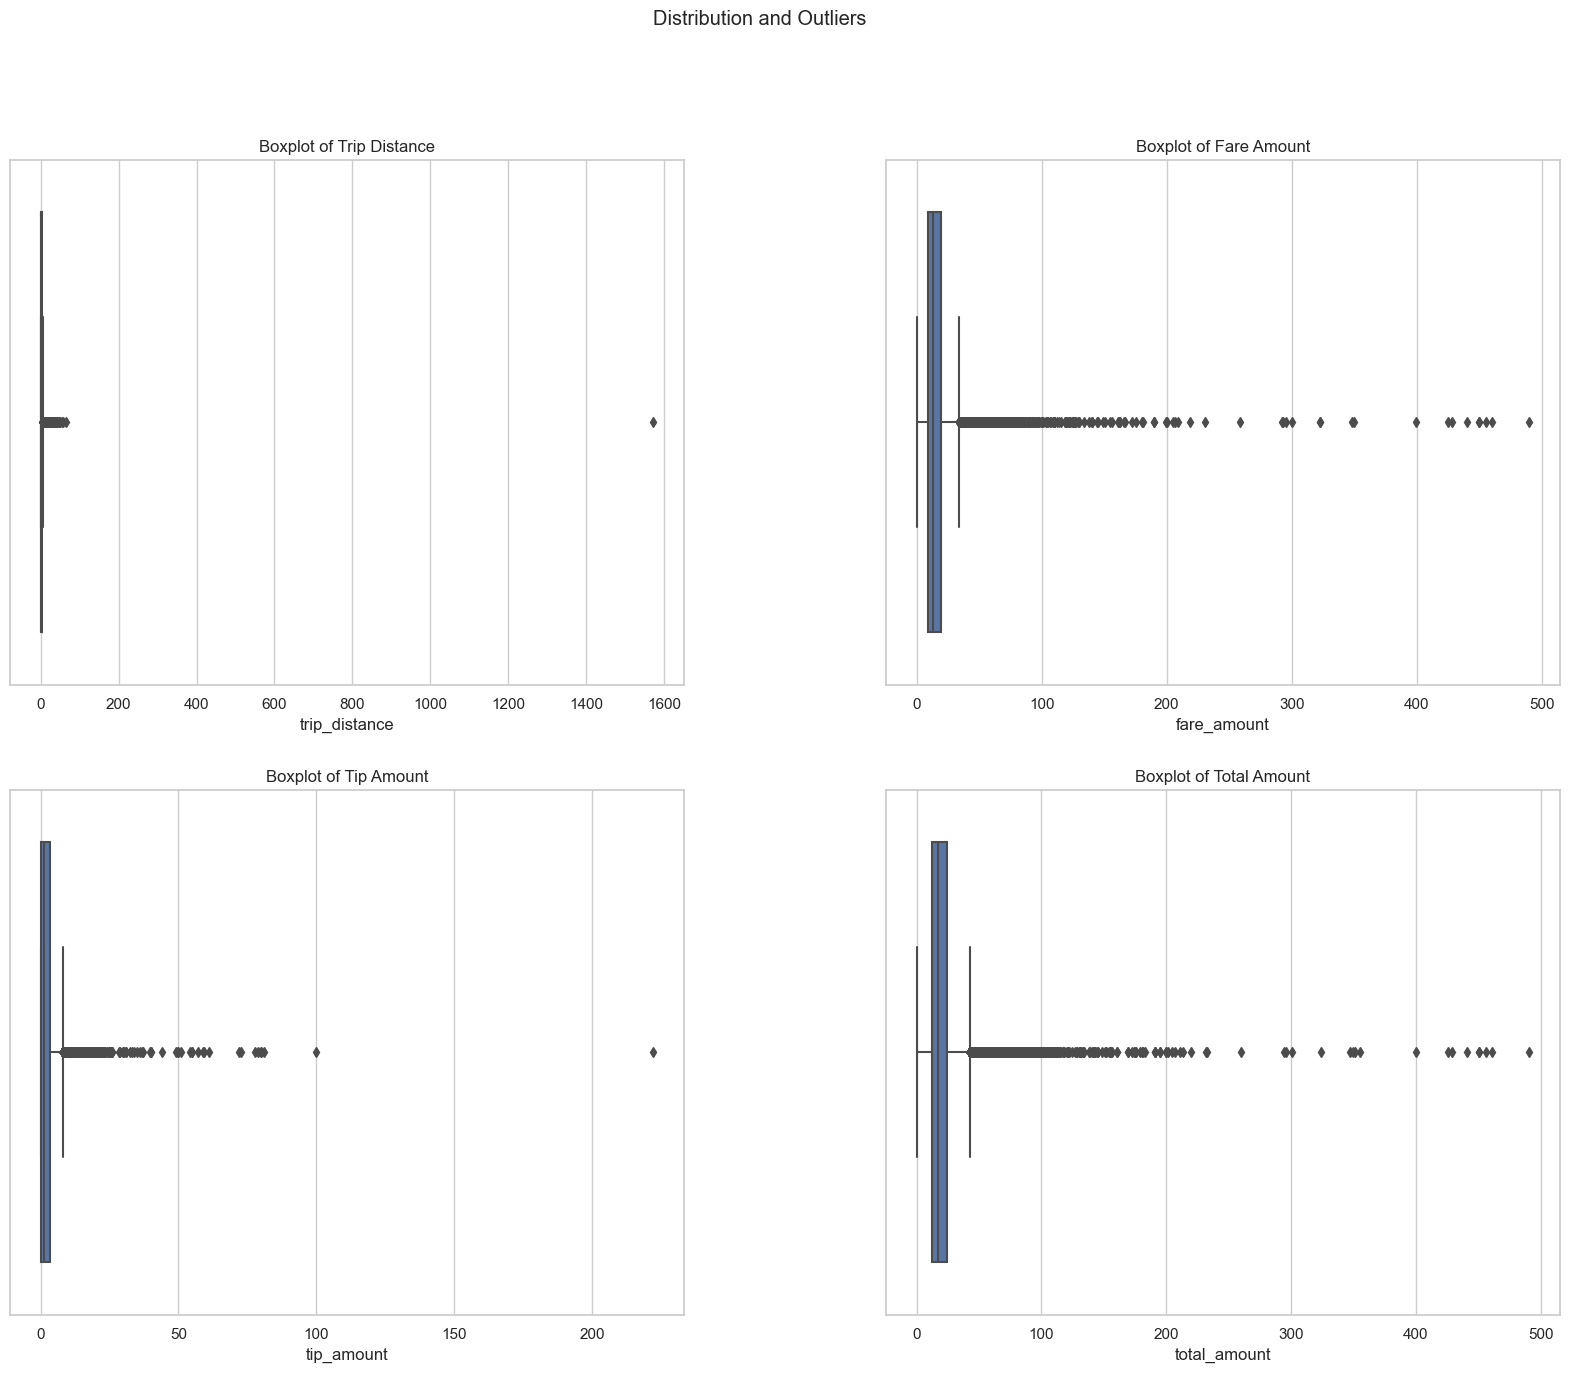

In [242]:
sns.set(style="whitegrid")

# Membuat subplots
fig, axes = plt.subplots(2, 2, figsize=(20, 15))
plt.subplots_adjust(wspace=0.3)
# Menambahkan judul utama
plt.suptitle("Distribution and Outliers")

# Boxplot untuk trip_distance
sns.boxplot(ax=axes[0, 0], data=NYC_Taxi_Set_Clean, x="trip_distance")
axes[0, 0].set_title("Boxplot of Trip Distance")

# Boxplot untuk fare_amount
sns.boxplot(ax=axes[0, 1], data=NYC_Taxi_Set_Clean, x="fare_amount")
axes[0, 1].set_title("Boxplot of Fare Amount")

# Boxplot untuk tip_amount
sns.boxplot(ax=axes[1, 0], data=NYC_Taxi_Set_Clean, x="tip_amount")
axes[1, 0].set_title("Boxplot of Tip Amount")

# Boxplot untuk total_amount
sns.boxplot(ax=axes[1, 1], data=NYC_Taxi_Set_Clean, x="total_amount")
axes[1, 1].set_title("Boxplot of Total Amount")

plt.show()

Setelah saya melihat visualisasinya terdapat 4 kolom tersebut mempunyai distribusi right skew dan mempunyai jumlah outlier yang banyak.<br>

Kemudian terdapat anomali di kolom ***"trip_distance"*** yang dimana tidak masuk akal yaitu 1500 Miles, maka saya akan menghapus baris ini.<Br>

Untuk kolom ***"total / fare amount"*** tidak saya hapus outlirenya, karena pada kolom ini, Perusahaan Taxi dan Supir lah yang menentukan harganya.
Kemudian untuk ***"tip_amount"*** kolom ini saya tidak akan hapus outliernya juga, sebab value terdapat pada kolom ini ditentukan oleh sang penumpang<Br>




In [243]:
NYC_Taxi_Set_Clean[NYC_Taxi_Set_Clean['trip_distance']>1500]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type
33373,2,2023-01-17 18:40:38,2023-01-17 19:04:45,N,5,82,236,1,1571.97,29.97,0.0,0.0,3.04,6.55,1.0,40.56,1,1


In [244]:
NYC_Taxi_Set_Clean.drop(NYC_Taxi_Set_Clean[NYC_Taxi_Set_Clean['trip_distance']>1500].index, inplace=True)

In [245]:
NYC_Taxi_Set_Clean[NYC_Taxi_Set_Clean['trip_distance']>1500]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type


- ### **Step 11**

Sesudah itu, saya juga menemukan value 0 dikolom ***"trip_distance"***, yang dimana saya tidak dapat mengisi value tersebut dikarenakan saya tidak mempunyai refrensi kolom ***"PU dan DO LocationID"***. Maka dari itu saya akan menghapusnya saja.

In [246]:
NYC_Taxi_Set_Clean[NYC_Taxi_Set_Clean['trip_distance']==0]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1,223,179,1,0.0,7.2,1.0,0.5,1.94,0.0,1.0,11.64,1,1
58,2,2023-01-01 00:57:15,2023-01-01 01:00:15,N,1,75,75,1,0.0,4.4,1.0,0.5,1.38,0.0,1.0,8.28,1,1
107,2,2023-01-01 01:11:13,2023-01-01 01:11:36,N,1,7,7,1,0.0,3.0,1.0,0.5,9.00,0.0,1.0,14.50,1,1
115,2,2023-01-01 01:52:58,2023-01-01 01:53:00,N,1,264,264,1,0.0,3.0,1.0,0.5,21.50,0.0,0.3,26.30,1,1
166,2,2023-01-01 02:37:12,2023-01-01 02:37:15,N,5,51,264,3,0.0,40.0,0.0,0.0,0.00,0.0,1.0,41.00,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63798,2,2023-01-31 22:19:41,2023-01-31 22:27:59,N,1,42,152,1,0.0,8.6,1.0,0.5,0.00,0.0,1.0,11.10,2,1
63813,2,2023-01-31 22:29:03,2023-01-31 22:35:11,N,1,95,95,2,0.0,7.2,1.0,0.5,0.00,0.0,1.0,9.70,2,1
63833,2,2023-01-31 22:43:19,2023-01-31 22:46:09,N,5,130,130,1,0.0,10.0,0.0,0.0,0.00,0.0,1.0,11.00,2,2
63868,2,2023-01-31 23:44:44,2023-01-31 23:45:15,N,5,264,264,1,0.0,10.0,0.0,0.0,0.00,0.0,1.0,11.00,4,2


In [247]:
NYC_Taxi_Set_Clean.drop(NYC_Taxi_Set_Clean[NYC_Taxi_Set_Clean['trip_distance']==0].index, inplace=True)

In [248]:
NYC_Taxi_Set_Clean[NYC_Taxi_Set_Clean['trip_distance']==0]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type


In [249]:
NYC_Taxi_Set_Clean

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1,166,143,1,2.58,14.9,1.0,0.5,4.03,0.0,1.0,21.43,1,1
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1,24,43,1,1.81,10.7,1.0,0.5,2.64,0.0,1.0,15.84,1,1
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1,41,238,1,1.30,6.5,0.5,1.5,1.70,0.0,1.0,11.20,1,1
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1,41,74,1,1.10,6.0,0.5,1.5,0.00,0.0,1.0,9.00,1,1
5,2,2023-01-01 00:53:31,2023-01-01 01:11:04,N,1,41,262,1,2.78,17.7,1.0,0.5,0.00,0.0,1.0,20.20,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63882,2,2023-01-31 23:09:22,2023-01-31 23:17:21,N,5,130,205,1,2.75,15.0,0.0,0.0,2.00,0.0,0.3,17.30,1,2
63883,2,2023-01-31 23:06:18,2023-01-31 23:17:03,N,1,65,181,1,2.44,13.5,1.0,0.5,3.20,0.0,1.0,19.20,1,1
63884,2,2023-01-31 23:17:03,2023-01-31 23:23:04,N,1,244,116,1,1.40,9.3,1.0,0.5,2.36,0.0,1.0,14.16,1,1
63885,2,2023-01-31 23:29:18,2023-01-31 23:38:50,N,1,74,238,1,2.47,13.5,1.0,0.5,3.75,0.0,1.0,19.75,1,1


- ### **Step 12**

Di bawah ini saya akan mengubah ID yang mewakili sebuah kategori menjadi nama kategori itu sendiri Pada kolom ***"VendorID"***, ***"RatecodeID"***, ***"payment_type"***, dan ***"trip_type"*** Agar memudahkan saya menganalisanya.

In [276]:
NYC_Taxi_Set_Clean_Mod = NYC_Taxi_Set_Clean.copy()

In [252]:
NYC_Taxi_Set_Clean_Mod['VendorID'].astype(str)
NYC_Taxi_Set_Clean_Mod['RatecodeID'].astype(str)
NYC_Taxi_Set_Clean_Mod['payment_type'].astype(str)
NYC_Taxi_Set_Clean_Mod['trip_type'].astype(str)



NYC_Taxi_Set_Clean_Mod['VendorID'].replace({1: 'Creative Mobile Technologies, LLC.', 2: 'VeriFone Inc.'}, inplace=True)
NYC_Taxi_Set_Clean_Mod['RatecodeID'].replace({
    1: 'Standard rate',
    2: 'JFK',
    3: 'Newark',
    4: 'Nassau or Westchester',
    5: 'Negotiated fare'
}, inplace=True)
NYC_Taxi_Set_Clean_Mod['payment_type'].replace({1:'Credit card', 
 2: "Cash",
 3: "No charge",
 4: "Dispute",
 5: "Unknown",
 6: "Voided trip"
},inplace=True)
NYC_Taxi_Set_Clean_Mod['trip_type'].replace({1: "Street-hail",
2 : 'Dispatch'},inplace=True)

In [253]:
pd.set_option('display.max_colwidth', None)
listItem = []
for col in NYC_Taxi_Set_Clean_Mod.columns:
    unique_values = NYC_Taxi_Set_Clean_Mod[col].nunique()
    if unique_values >= 20:
        listItem.append([col, NYC_Taxi_Set_Clean_Mod[col].dtype, NYC_Taxi_Set_Clean_Mod[col].isna().sum(), round((NYC_Taxi_Set_Clean_Mod[col].isna().sum()/len(NYC_Taxi_Set_Clean_Mod[col])) * 100,2),
                         unique_values, list(NYC_Taxi_Set_Clean_Mod[col].drop_duplicates().sample(20).values)]);
    else:
        listItem.append([col, NYC_Taxi_Set_Clean_Mod[col].dtype, NYC_Taxi_Set_Clean_Mod[col].isna().sum(), round((NYC_Taxi_Set_Clean_Mod[col].isna().sum()/len(NYC_Taxi_Set_Clean_Mod[col])) * 100,2),
                         unique_values, list(NYC_Taxi_Set_Clean_Mod[col].drop_duplicates().values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                      data=listItem)
dfDesc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,VendorID,object,0,0.0,2,"[VeriFone Inc., Creative Mobile Technologies, LLC.]"
1,lpep_pickup_datetime,datetime64[ns],0,0.0,59347,"[2023-01-30T16:13:26.000000000, 2023-01-26T18:15:40.000000000, 2023-01-31T14:58:57.000000000, 2023-01-15T22:21:20.000000000, 2023-01-21T16:33:24.000000000, 2023-01-09T20:07:20.000000000, 2023-01-28T21:53:56.000000000, 2023-01-11T15:08:05.000000000, 2023-01-15T23:32:56.000000000, 2023-01-25T22:58:08.000000000, 2023-01-31T09:51:04.000000000, 2023-01-04T15:17:20.000000000, 2023-01-11T08:43:52.000000000, 2023-01-16T07:20:49.000000000, 2023-01-11T10:34:06.000000000, 2023-01-03T11:36:56.000000000, 2023-01-05T16:32:04.000000000, 2023-01-30T03:30:11.000000000, 2023-01-20T09:29:26.000000000, 2023-01-11T16:48:04.000000000]"
2,lpep_dropoff_datetime,datetime64[ns],0,0.0,59257,"[2023-01-30T09:59:55.000000000, 2023-01-22T13:35:31.000000000, 2023-01-11T10:11:04.000000000, 2023-01-12T19:11:32.000000000, 2023-01-20T21:45:07.000000000, 2023-01-07T09:10:47.000000000, 2023-01-01T02:11:36.000000000, 2023-01-11T13:33:03.000000000, 2023-01-14T13:40:52.000000000, 2023-01-13T10:00:46.000000000, 2023-01-23T20:39:49.000000000, 2023-01-20T15:01:36.000000000, 2023-01-03T08:25:07.000000000, 2023-01-13T17:50:03.000000000, 2023-01-26T14:59:04.000000000, 2023-01-16T17:44:55.000000000, 2023-01-04T18:46:09.000000000, 2023-01-13T16:45:45.000000000, 2023-01-17T15:37:53.000000000, 2023-01-17T21:47:49.000000000]"
3,store_and_fwd_flag,object,0,0.0,2,"[N, Y]"
4,RatecodeID,object,0,0.0,5,"[Standard rate, Negotiated fare, Nassau or Westchester, Newark, JFK]"
5,PULocationID,int64,0,0.0,186,"[146, 31, 160, 191, 197, 43, 120, 150, 73, 135, 208, 256, 101, 134, 174, 183, 91, 11, 71, 55]"
6,DOLocationID,int64,0,0.0,245,"[9, 223, 124, 4, 182, 1, 86, 87, 24, 185, 179, 201, 198, 61, 154, 181, 224, 208, 240, 162]"
7,passenger_count,int32,0,0.0,8,"[1, 2, 4, 3, 6, 5, 8, 7]"
8,trip_distance,float64,0,0.0,1723,"[13.28, 10.61, 11.74, 18.7, 5.87, 15.13, 9.06, 1.96, 4.15, 18.27, 12.73, 7.05, 5.92, 9.07, 13.75, 1.08, 12.42, 15.4, 8.5, 23.92]"
9,fare_amount,float64,0,0.0,356,"[28.46, 16.0, 425.0, 20.0, 103.8, 60.4, 45.5, 72.3, 3.0, 29.5, 42.3, 80.7, 99.6, 24.6, 67.4, 85.6, 74.8, 4.5, 66.7, 41.5]"


Kemudian saya menambahkan kolom baru yaitu miles_distance, yang dimana kolom ini adalah kolom pengkelompokan trip_distance.

In [254]:
def add_miles_distance(df):
    bins = [0, 5, 15, 25, 35, 45, 55, 65, df['trip_distance'].max()]
    labels = ['0.1-5 miles', '6-15 miles', '16-25 miles', '26-35 miles', '36-45 miles', '46-55 miles', '56-65 miles', '>65 miles']
    df['miles_distance'] = pd.cut(df['trip_distance'], bins=bins, labels=labels, include_lowest=True)
    
    return df

NYC_Taxi_Set_Clean_Mod_V1 = add_miles_distance(NYC_Taxi_Set_Clean_Mod)

In [255]:
NYC_Taxi_Set_Clean_Mod_V1.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,miles_distance
0,VeriFone Inc.,2023-01-01 00:26:10,2023-01-01 00:37:11,N,Standard rate,166,143,1,2.58,14.9,1.0,0.5,4.03,0.0,1.0,21.43,Credit card,Street-hail,0.1-5 miles
1,VeriFone Inc.,2023-01-01 00:51:03,2023-01-01 00:57:49,N,Standard rate,24,43,1,1.81,10.7,1.0,0.5,2.64,0.0,1.0,15.84,Credit card,Street-hail,0.1-5 miles
3,"Creative Mobile Technologies, LLC.",2023-01-01 00:13:14,2023-01-01 00:19:03,N,Standard rate,41,238,1,1.30,6.5,0.5,1.5,1.70,0.0,1.0,11.20,Credit card,Street-hail,0.1-5 miles
4,"Creative Mobile Technologies, LLC.",2023-01-01 00:33:04,2023-01-01 00:39:02,N,Standard rate,41,74,1,1.10,6.0,0.5,1.5,0.00,0.0,1.0,9.00,Credit card,Street-hail,0.1-5 miles
5,VeriFone Inc.,2023-01-01 00:53:31,2023-01-01 01:11:04,N,Standard rate,41,262,1,2.78,17.7,1.0,0.5,0.00,0.0,1.0,20.20,Cash,Street-hail,0.1-5 miles


Sekarang kita simpan menjadi file Excel untuk kebutuhan Visual di Tableau

In [256]:
# NYC_Taxi_Set_Clean_Mod_V1.to_excel(r'D:\File Sekul Purwadhika\DS STUFF\Modul_2\Data_Analyst\Data_Set\Project_Capstone\New York City Taxi and Limousine Trip Record\NYC TLC Trip Record Clean Mod V1.xlsx',index=False)

Okay, Data Sudah bersih dan siap dipakai untuk kebutuhan analisa.

---
### **Data Analysis**


#### **Business Performance Analysis**

Pada Kasus ini saya akan mencari faktor apa yang bisa meningkatkan penghasilan dari 2 perushaan tersebut, yaitu bagaimana agar para penumpang mau membayar tarif taxi mereka dengan layanan sistem mereka yaitu, Credit Card.

Pertama saya akan lihat Total Revenue Perushaan Taxi yang saya bagi menjadi 2 vendor yaitu VeriFone Inc. & Creative Mobile Technologies, LLC. dan Perlu dingat Bahwa dibawah ini adalah Revenu Perusahaan Taxi, dan Revenue yang dihasilkan oleh kedua Vendor tersebut disesuaikan dengan perjanjian mereka dengan Perushaan Taxi. **Yang dimana perjanjian itu TIDAK SAYA KETAHUI berapa persen Revenue yang Vendor dapatkan dari layanan mereka berikan kepada perusahaan Taxi tersebut.**

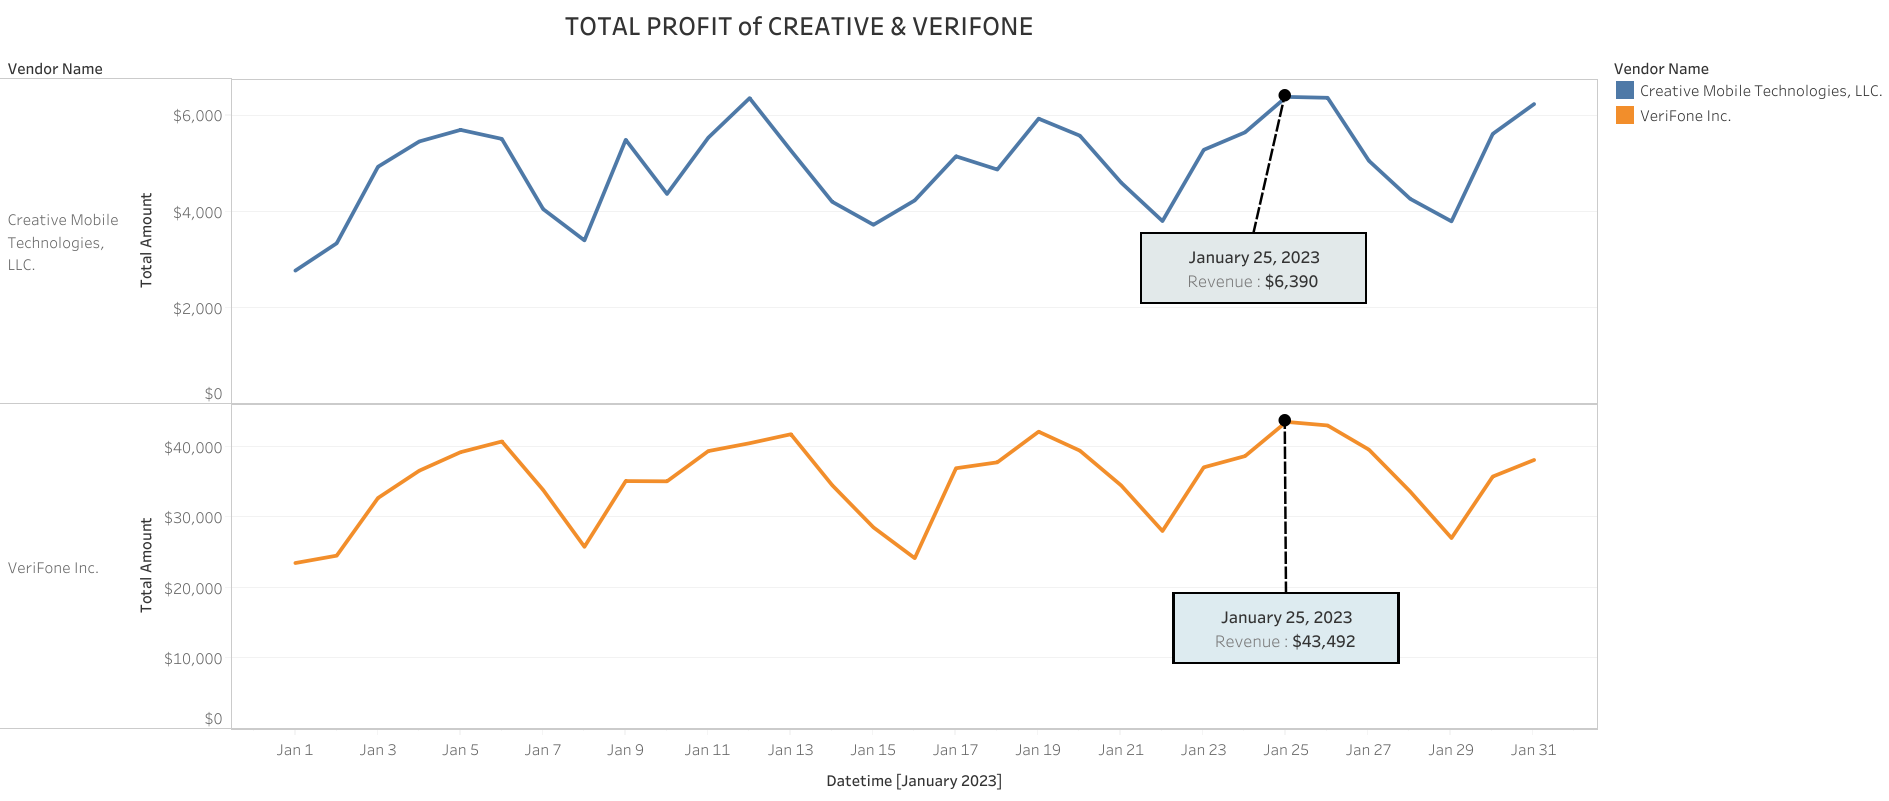

In [257]:
Image(filename=r"D:\File Sekul Purwadhika\DS STUFF\Modul_2\Data_Analyst\Data_Set\Project_Capstone\Total Profit.png")

Saya lihat kedua vendor menghasilkan pola trend yang sama, dan mempunyai tanggal penghasilan terbesar yang sama yaitu tanggal 25 January.

#### **Revenue Growth**

Kemudian step analisa selanjutnya, saya ingin melihat pertumbuhan Revenue Perusahaan Taxi dalam (%) yang saya kelompokan masing-masing vendor berdasarkan RatecodeID.

Berikut langkah-langkah untuk melihat Revenue Growth:
- Membuat variable baru berdasarkan nama vendor, dan kemudian menggunakan 3 kolom yang dibutuhkan, yaitu ***lpep_dropoff_datetime,RatecodeID, dan total_amount***.
- Mengubah format ***lpep_dropoff_datetime*** menjadi **Tahun, Bulan, dan Tanggal.**
- Mengkelompokan berdasarkan ***RatecodeID*** dan ***lpep_dropoff_datetime***, kemudian menjumlahkan ***total_amount***.
- Menambahkan kolom baru dengan nama ***Growth (%)*** yang berisi persentase seberapa besar pertumbuhan atau penurunan pendapatan 2 vendor tersebut dari waktu ke waktu.
- Menjadikan 1 dataframe untuk masing-masing vendor.
- Menampilkan secara visual menggunakan line plot.

In [258]:
Verifone = NYC_Taxi_Set_Clean_Mod[NYC_Taxi_Set_Clean_Mod['VendorID']=='VeriFone Inc.'][['lpep_dropoff_datetime','RatecodeID','total_amount']]
Creative = NYC_Taxi_Set_Clean_Mod[NYC_Taxi_Set_Clean_Mod['VendorID']=='Creative Mobile Technologies, LLC.'][['lpep_dropoff_datetime','RatecodeID','total_amount']]


In [259]:
Verifone['lpep_dropoff_datetime'] = pd.to_datetime(Verifone['lpep_dropoff_datetime'].dt.date)
Creative['lpep_dropoff_datetime'] = pd.to_datetime(Creative['lpep_dropoff_datetime'].dt.date)

In [260]:
Verifone_group = Verifone.groupby(['RatecodeID','lpep_dropoff_datetime'])[['total_amount']].sum().reset_index()
Creative_group = Creative.groupby(['RatecodeID','lpep_dropoff_datetime'])[['total_amount']].sum().reset_index()

display(Verifone_group.head(),Creative_group.head())

,RatecodeID,lpep_dropoff_datetime,total_amount
0,JFK,2023-01-01,258.82
1,JFK,2023-01-02,191.22
2,JFK,2023-01-03,93.66
3,JFK,2023-01-04,99.66
4,JFK,2023-01-05,610.46


,RatecodeID,lpep_dropoff_datetime,total_amount
0,JFK,2023-01-01,94.65
1,JFK,2023-01-04,189.70
2,JFK,2023-01-06,99.05
3,JFK,2023-01-08,189.31
4,JFK,2023-01-14,150.55


In [261]:
Verifone_group_JFK =Verifone_group[Verifone_group['RatecodeID']=='JFK']
Verifone_group_Nassau_or_Westchester =Verifone_group[Verifone_group['RatecodeID']=='Nassau or Westchester']
Verifone_group_Newark =Verifone_group[Verifone_group['RatecodeID']=='Newark']
Verifone_group_Negotiated_fare =Verifone_group[Verifone_group['RatecodeID']=='Negotiated fare']
Verifone_group_Standard_rate =Verifone_group[Verifone_group['RatecodeID']=='Standard rate']

Creative_group_JFK =Creative_group[Creative_group['RatecodeID']=='JFK']
Creative_group_Nassau_or_Westchester =Creative_group[Creative_group['RatecodeID']=='Nassau or Westchester']
Creative_group_Newark =Creative_group[Creative_group['RatecodeID']=='Newark']
Creative_group_Negotiated_fare =Creative_group[Creative_group['RatecodeID']=='Negotiated fare']
Creative_group_Standard_rate =Creative_group[Creative_group['RatecodeID']=='Standard rate']

In [262]:
Verifone_group_JFK_growth=Verifone_group_JFK.copy()
Verifone_group_Nassau_or_Westchester_growth=Verifone_group_Nassau_or_Westchester.copy()
Verifone_group_Newark_growth=Verifone_group_Newark.copy()
Verifone_group_Negotiated_fare_growth=Verifone_group_Negotiated_fare.copy()
Verifone_group_Standard_rate_growth=Verifone_group_Standard_rate.copy()

Creative_group_JFK_growth=Creative_group_JFK.copy()
Creative_group_Nassau_or_Westchester_growth=Creative_group_Nassau_or_Westchester.copy()
Creative_group_Newark_growth=Creative_group_Newark.copy()
Creative_group_Negotiated_fare_growth=Creative_group_Negotiated_fare.copy()
Creative_group_Standard_rate_growth=Creative_group_Standard_rate.copy()

Verifone_group_JFK_growth['Growth (%)'] = (Verifone_group_JFK_growth['total_amount'].pct_change()*100).round(2)
Verifone_group_Nassau_or_Westchester_growth['Growth (%)'] = (Verifone_group_Nassau_or_Westchester_growth['total_amount'].pct_change()*100).round(2)
Verifone_group_Newark_growth['Growth (%)'] = (Verifone_group_Newark_growth['total_amount'].pct_change()*100).round(2)
Verifone_group_Negotiated_fare_growth['Growth (%)'] = (Verifone_group_Negotiated_fare_growth['total_amount'].pct_change()*100).round(2)
Verifone_group_Standard_rate_growth['Growth (%)'] = (Verifone_group_Standard_rate_growth['total_amount'].pct_change()*100).round(2)

Creative_group_JFK_growth['Growth (%)'] = (Creative_group_JFK_growth['total_amount'].pct_change()*100).round(2)
Creative_group_Nassau_or_Westchester_growth['Growth (%)'] = (Creative_group_Nassau_or_Westchester_growth['total_amount'].pct_change()*100).round(2)
Creative_group_Newark_growth['Growth (%)'] = (Creative_group_Newark_growth['total_amount'].pct_change()*100).round(2)
Creative_group_Negotiated_fare_growth['Growth (%)'] = (Creative_group_Negotiated_fare_growth['total_amount'].pct_change()*100).round(2)
Creative_group_Standard_rate_growth['Growth (%)'] = (Creative_group_Standard_rate_growth['total_amount'].pct_change()*100).round(2)

In [263]:
Verifone_df = pd.concat([Verifone_group_JFK_growth, Verifone_group_Nassau_or_Westchester_growth, Verifone_group_Newark_growth, Verifone_group_Negotiated_fare_growth, Verifone_group_Standard_rate_growth])
Creative_df = pd.concat([Creative_group_JFK_growth, Creative_group_Nassau_or_Westchester_growth, Creative_group_Newark_growth, Creative_group_Negotiated_fare_growth, Creative_group_Standard_rate_growth])

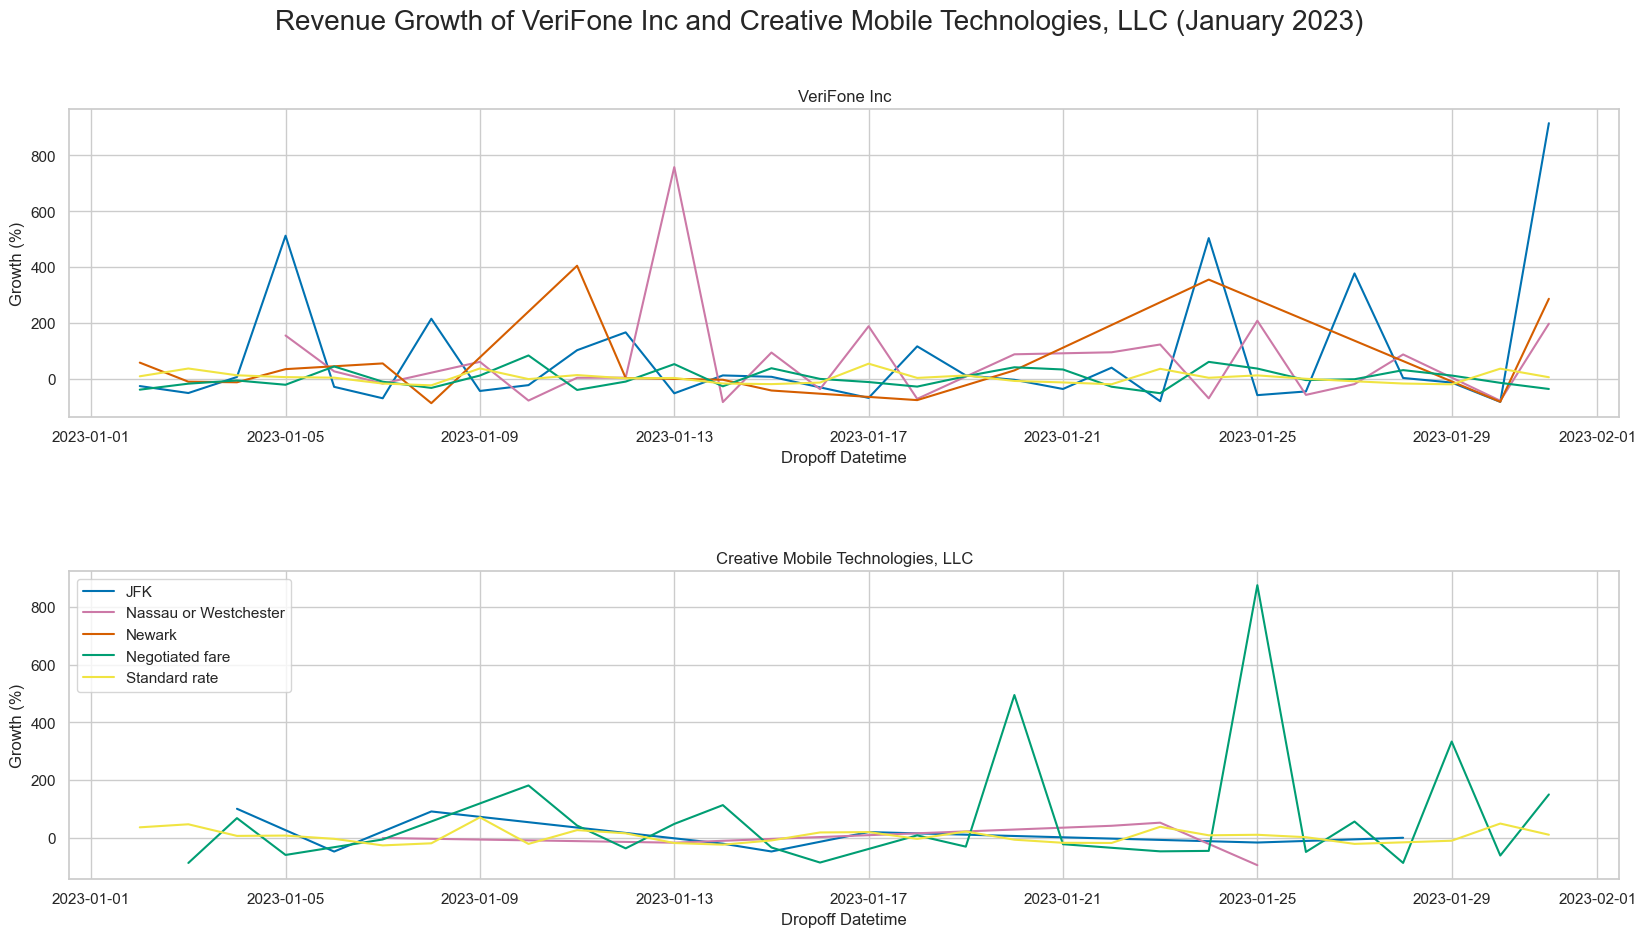

In [264]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 10))
fig.subplots_adjust(hspace=0.5)
fig.suptitle('Revenue Growth of VeriFone Inc and Creative Mobile Technologies, LLC (January 2023)',size=20)
my_palette = ['#0072B2', '#CC79A7', '#D55E00', '#009E73', '#F0E442']

sns.lineplot(
    data=Verifone_df,
    x='lpep_dropoff_datetime',
    y='Growth (%)',
    hue='RatecodeID',
    estimator=np.sum,
    ci=0,
    palette=my_palette,
    ax=ax1,
)
ax1.set_title('VeriFone Inc')
ax1.get_legend().remove()

sns.lineplot(
    data=Creative_df,
    x='lpep_dropoff_datetime',
    y='Growth (%)',
    hue='RatecodeID',
    estimator=np.sum,
    ci=0,
    palette=my_palette,
    ax=ax2,
)
ax2.set_title('Creative Mobile Technologies, LLC')

handles, labels = ax2.get_legend_handles_labels()
ax2.legend(handles, labels, loc='upper left')

ax1.set_xlabel('Dropoff Datetime')
ax2.set_xlabel('Dropoff Datetime')

plt.show()

#### ***Insights***

- ### Verifone:
    - Growth Revenue trend pada JFK mengalami peningkatan yang sangat tinggi pada akhir bulan.
    - Growth Revenue trend pada Nassau or Westcherster mengalami hal yang sama yaitu peningkatan Revenue pada tanggal 13 dan pada esok harinya mengalami penurunan yang drastis.
    - Overall Growth Revenue tiap RatecodeID mengalami fluktuasi acak.

- ### Creative:
    - Growth Revenue trend pada Negotiated fare mengalami peningkatan signifikan pada tanggal 25.
    - Overall Growth Revenue tiap RatecodeID mengalami fluktuasi acak.

#### **Revenue Taxi based RateCodeID per Vendor**

Kemudian Step Analisa selanjutnya, Saya ingin melihat berapa banyak Revenue yang dihasilkan oleh perusahaan Taxi dalam (USD$)berdasarkan RateCodeID yang kemudian saya bagi menjadi masing-masing vendor.<br>

Berikut langkah-langkah untuk melihat Revenue based RateCodeID per Vendor:<br>
- Membuat variable baru dan kemudian menjumlahkan total_amount/Revenue berdasarkan kategori RatecodeID dan di sort value berdasarkan Revenue nya.<br>
- Menampilakan visual dengan Bar plot.



In [265]:
Verifone_Sum =Verifone.groupby('RatecodeID')[['total_amount']].sum().reset_index().sort_values(by='total_amount')
Creative_Sum =Creative.groupby('RatecodeID')[['total_amount']].sum().reset_index().sort_values(by='total_amount')

display(Verifone_Sum,Creative_Sum)

,RatecodeID,total_amount
3,Newark,2007.61
1,Nassau or Westchester,5529.84
0,JFK,10461.19
2,Negotiated fare,31145.11
4,Standard rate,1042327.58


,RatecodeID,total_amount
3,Newark,65.35
1,Nassau or Westchester,338.70
0,JFK,1055.06
2,Negotiated fare,1284.72
4,Standard rate,150421.60


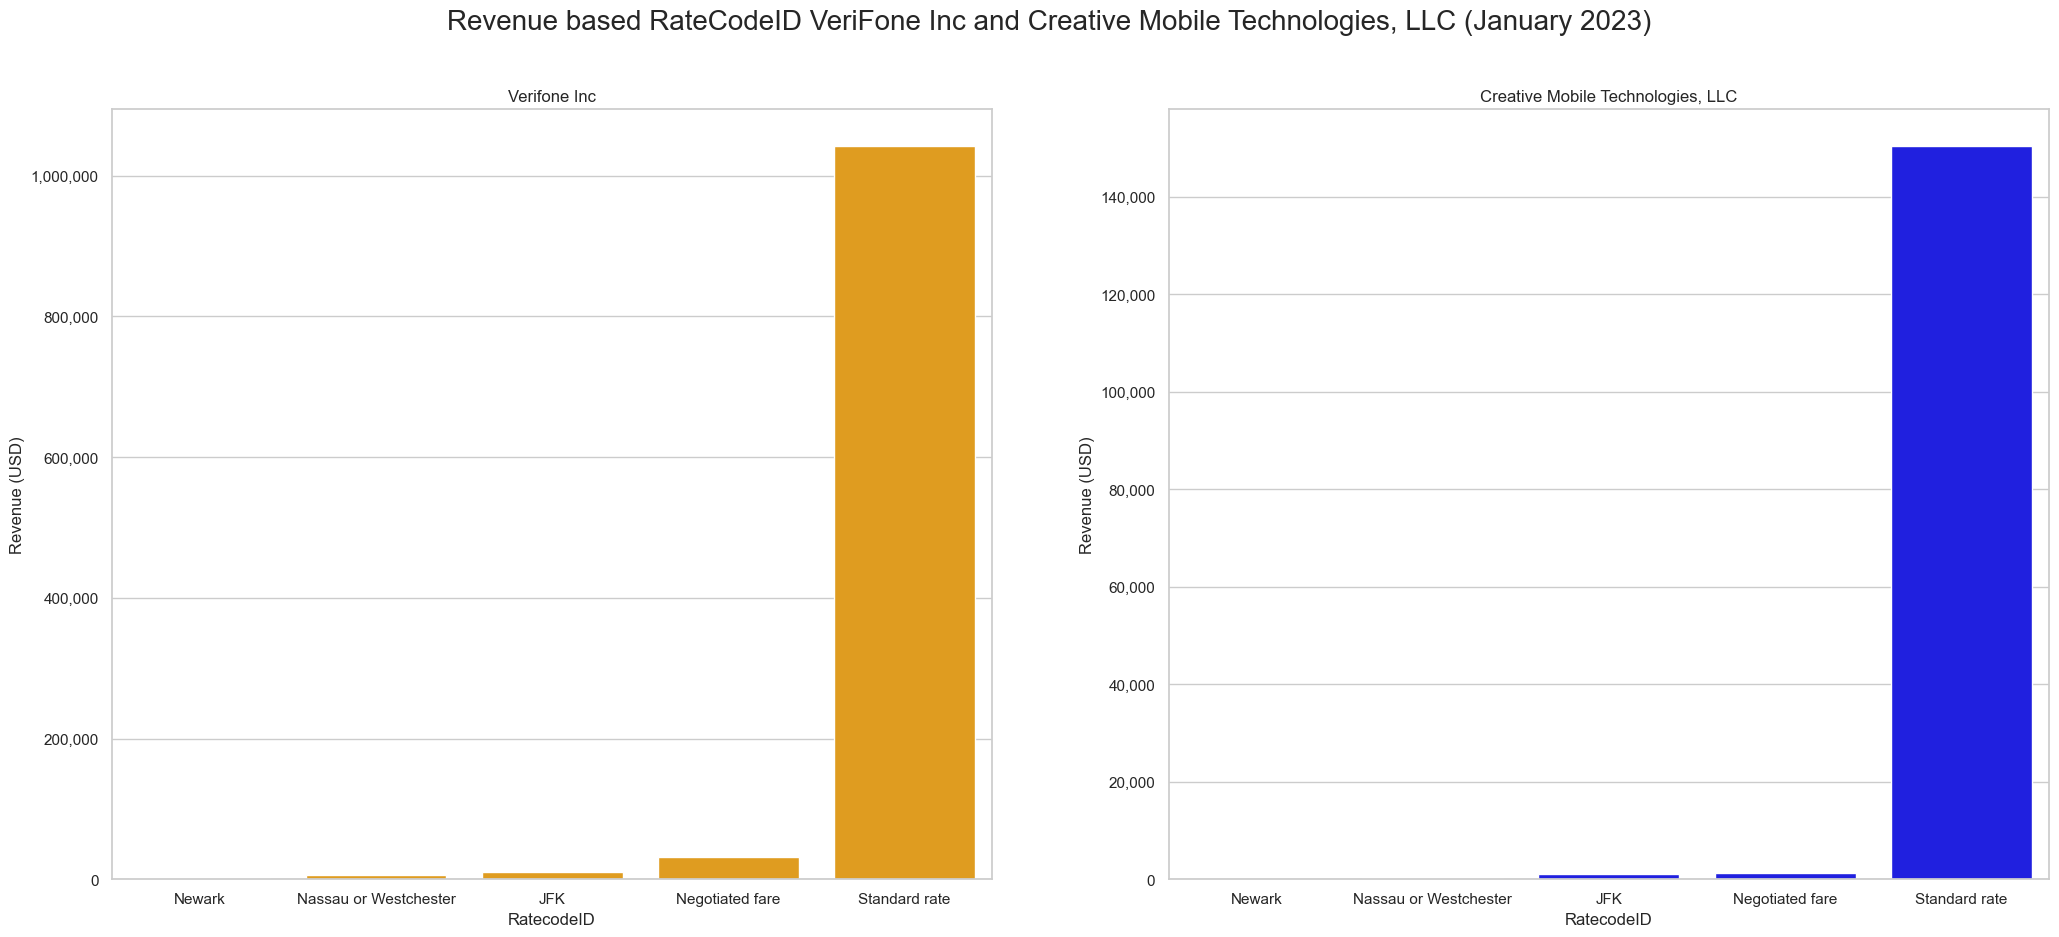

In [266]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(25, 10))
fig.suptitle('Revenue based RateCodeID VeriFone Inc and Creative Mobile Technologies, LLC (January 2023)',size=20)


sns.barplot(data=Verifone_Sum, x='RatecodeID', y='total_amount',ci=0, color='orange',label='Verifone',ax=ax1)
sns.barplot(data=Creative_Sum, x='RatecodeID', y='total_amount',ci=0, color='blue',label='Creative',ax=ax2)


formatter = ticker.StrMethodFormatter('{x:,.0f}')
ax1.yaxis.set_major_formatter(formatter)
ax2.yaxis.set_major_formatter(formatter)


ax1.set_ylabel('Revenue (USD)')
ax2.set_ylabel('Revenue (USD)')


ax2.legend().set_visible(False)


ax1.set_title('Verifone Inc')
ax2.set_title('Creative Mobile Technologies, LLC')

plt.show()

#### ***Insights***

- RateCodeID Standard rate paling banyak menghasilkan Revenue dibanding dengan Ratecode yang lain di antara kedua vendor. Akan tetapi yang menghasilnyakan lebih banyak  adalah Vendor Verifone.<br>
- Dari kedua vendor, Tarif Perjalanan yang New Yokers sukai adalah Perjalan Standard rate atau disebut perjalan dalam kota.<br>

Note: RateCodeID adalah Kode Perjalanannya

---
#### **Operational Performance Analysis**

#### **Operational Taxi**

Analisa ini saya ingin melihat performa operasional taxi di NYC.

Berikut langkah-langkah untuk melihat Operational Taxi:
- Membuat variable baru, dan menggunakan 4 kolom yaitu ***'VendorID'***,***'RatecodeID'***,***'store_and_fwd_flag'***,dan ***'trip_type'***.
- Mengubah menjadi Pivot table dengan menggunakan Metode Crosstab.
- Menampilkan visual menggunakan Heatmap.


In [267]:
Operational=NYC_Taxi_Set_Clean_Mod[['VendorID','RatecodeID','store_and_fwd_flag','trip_type']]
Operational.head()

,VendorID,RatecodeID,store_and_fwd_flag,trip_type
0,VeriFone Inc.,Standard rate,N,Street-hail
1,VeriFone Inc.,Standard rate,N,Street-hail
3,"Creative Mobile Technologies, LLC.",Standard rate,N,Street-hail
4,"Creative Mobile Technologies, LLC.",Standard rate,N,Street-hail
5,VeriFone Inc.,Standard rate,N,Street-hail


In [268]:
Operational_table=pd.crosstab(index=[Operational['VendorID'], Operational['trip_type']], columns=[Operational['RatecodeID'],Operational['store_and_fwd_flag']])
Operational_table.sort_index(level='VendorID',ascending=False, inplace=True)
Operational_table

RatecodeID                                      JFK Nassau or Westchester  \
store_and_fwd_flag                                N                     N   
VendorID                           trip_type                                
VeriFone Inc.                      Street-hail  120                    44   
                                   Dispatch       0                     2   
Creative Mobile Technologies, LLC. Street-hail   12                     7   
                                   Dispatch       0                     0   

RatecodeID                                     Negotiated fare Newark  \
store_and_fwd_flag                                           N      N   
VendorID                           trip_type                            
VeriFone Inc.                      Street-hail             102     18   
                                   Dispatch                806      0   
Creative Mobile Technologies, LLC. Street-hail              13      2   
                                   Dispatch                 40      0   

RatecodeID                                     Standard rate       
store_and_fwd_flag                                         N    Y  
VendorID                           trip_type                       
VeriFone Inc.                      Street-hail         51843    0  
                                   Dispatch                2    0  
Creative Mobile Technologies, LLC. Street-hail          7109  244  
                                   Dispatch                0    0

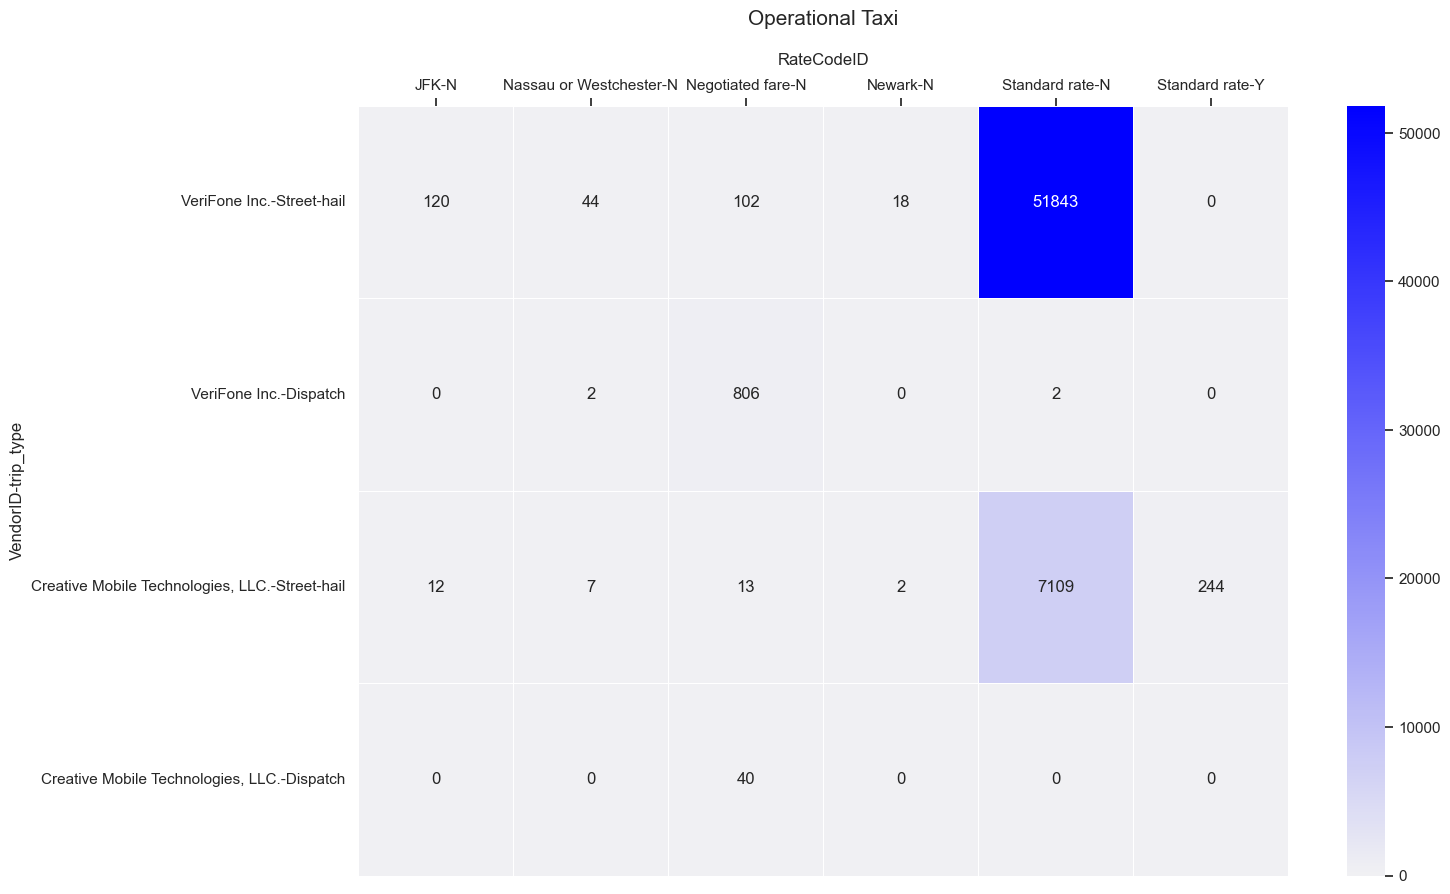

In [269]:
plt.figure(figsize=(15, 10))
plt.title('Operational Taxi',size=15,pad=20)
cmap = sns.light_palette("blue", as_cmap=True)
ax = sns.heatmap(Operational_table, cmap=cmap, annot=True, fmt="d", linewidths=.5)
ax.xaxis.tick_top()
ax.xaxis.set_label_position('top')
ax.set_xlabel("RateCodeID", labelpad=10)
plt.show()


#### ***Insights***

- Mayoritas taxi mengunakan metode penyimpanan rekaman perjalanan langsung ke server ditandai dengan (N), dan terdapat 244 perjalanan rekaman yang disimpan sementara dan lalu baru di upload ke server ditandai dengan (Y).
- Dari 2 vendor, street-hail adalah metode perjalanan yang populer, yang dimaksud bahwa kebanyakan penumpang  memangil taksi yang lewat dijalan dibanding memesan lewat telepon atau Uber, yang disebut Dispatch.

In [270]:
selected_cols = NYC_Taxi_Set_Clean_Mod[['VendorID', 'RatecodeID', 'trip_distance', 'total_amount', 'miles_distance']]
selected_cols

,VendorID,RatecodeID,trip_distance,total_amount,miles_distance
0,VeriFone Inc.,Standard rate,2.58,21.43,0.1-5 miles
1,VeriFone Inc.,Standard rate,1.81,15.84,0.1-5 miles
3,"Creative Mobile Technologies, LLC.",Standard rate,1.30,11.20,0.1-5 miles
4,"Creative Mobile Technologies, LLC.",Standard rate,1.10,9.00,0.1-5 miles
5,VeriFone Inc.,Standard rate,2.78,20.20,0.1-5 miles
...,...,...,...,...,...
63882,VeriFone Inc.,Negotiated fare,2.75,17.30,0.1-5 miles
63883,VeriFone Inc.,Standard rate,2.44,19.20,0.1-5 miles
63884,VeriFone Inc.,Standard rate,1.40,14.16,0.1-5 miles
63885,VeriFone Inc.,Standard rate,2.47,19.75,0.1-5 miles


***


#### **Pessenger Behavior Analysis**

#### **Payment type based RatecodeID**

Pada Analisa ini, saya ingin melihat Metode pembayaran apa yang sering digunakan oleh penumpang berdasarkan RateCodeID.

Berikut langkah-langkah untuk melihat Payment type based RatecodeID:
- Membuat variable yang baru, dan menggunakan 3 kolom yang diperlukan yaitu ***"VendorID"***, ***"RateCodeID"*** dan ***"payment_type"***.
- Mengubah menjadi Pivot table dengan menggunakan Metode Crosstab.
- Menampilkan visual menggunakan Heatmap.

In [271]:
Payment= NYC_Taxi_Set_Clean_Mod[['VendorID','RatecodeID','payment_type']]
Payment.head()

,VendorID,RatecodeID,payment_type
0,VeriFone Inc.,Standard rate,Credit card
1,VeriFone Inc.,Standard rate,Credit card
3,"Creative Mobile Technologies, LLC.",Standard rate,Credit card
4,"Creative Mobile Technologies, LLC.",Standard rate,Credit card
5,VeriFone Inc.,Standard rate,Cash


In [272]:
Payment_table = pd.crosstab(index=[Payment['VendorID'], Payment['RatecodeID']], columns=Payment['payment_type'])
Payment_table.sort_index(level='VendorID', ascending=False, inplace=True)
Payment_table

payment_type                                               Cash  Credit card  \
VendorID                           RatecodeID                                  
VeriFone Inc.                      Standard rate          18784        32867   
                                   Newark                     5           13   
                                   Negotiated fare          295          605   
                                   Nassau or Westchester     27           19   
                                   JFK                       30           88   
Creative Mobile Technologies, LLC. Standard rate           2590         4602   
                                   Newark                     1            1   
                                   Negotiated fare           27           22   
                                   Nassau or Westchester      4            2   
                                   JFK                        2            9   

payment_type                                              Dispute  No charge  
VendorID                           RatecodeID                                 
VeriFone Inc.                      Standard rate               42        152  
                                   Newark                       0          0  
                                   Negotiated fare              0          8  
                                   Nassau or Westchester        0          0  
                                   JFK                          0          2  
Creative Mobile Technologies, LLC. Standard rate               26        135  
                                   Newark                       0          0  
                                   Negotiated fare              1          3  
                                   Nassau or Westchester        1          0  
                                   JFK                          0          1

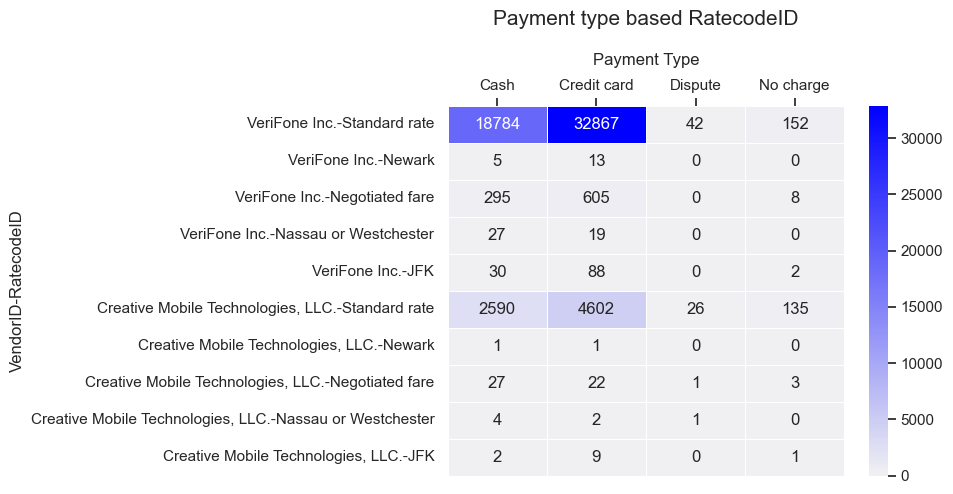

In [273]:
plt.title('Payment type based RatecodeID',size=15,pad=20)
cmap = sns.light_palette("blue", as_cmap=True)
ax=sns.heatmap(Payment_table, cmap=cmap, annot=True, fmt="d", linewidths=.5)

ax.xaxis.tick_top()
ax.xaxis.set_label_position('top')
ax.set_xlabel("Payment Type", labelpad=10)
plt.show()

#### ***Insights***

-  Penggunaan Metode Pembayaran yang paling banyak di antara 2 vendor adalah Credit Card.
-  ada 287 rekaman perjalanan, dimana penumpang mendapatkan hak istimewa yaitu tidak dikenakan biaya perjalanan.
-  ada 68 rekaman perjalanan, dimana ketika pelanggan merasa bahwa jumlah yang dibebankan oleh pengemudi tidak sesuai dengan tarif yang seharusnya dibebankan, atau ketika ada masalah dengan layanan yang diberikan oleh pengemudi.

#### **Miles Distance by Category Payment**

Tahap Anlisa terakhir saya ingin melihat kategori Miles Distance yang dikelompokan berdasarkan Category payment.
Berikut langkah-langkahnya:
- Membuat variable baru dan menggunakan 4 kolom yaitu, **'VendorID'**,**'RatecodeID'**,**'miles_distance'**,**'payment_type'**.
- Mengubah menjadi Pivot table dengan menggunakan Metode Crosstab.
- Menampilkan visual menggunakan Heatmap.


In [274]:
Miles = NYC_Taxi_Set_Clean_Mod_V1[['VendorID','RatecodeID','miles_distance','payment_type']]
Miles.head()

,VendorID,RatecodeID,miles_distance,payment_type
0,VeriFone Inc.,Standard rate,0.1-5 miles,Credit card
1,VeriFone Inc.,Standard rate,0.1-5 miles,Credit card
3,"Creative Mobile Technologies, LLC.",Standard rate,0.1-5 miles,Credit card
4,"Creative Mobile Technologies, LLC.",Standard rate,0.1-5 miles,Credit card
5,VeriFone Inc.,Standard rate,0.1-5 miles,Cash


In [275]:
pd.crosstab(index=[Miles['VendorID'],Miles['RatecodeID'],Miles['miles_distance']],columns=Miles['payment_type'])

payment_type                                                              Cash  \
VendorID                           RatecodeID            miles_distance          
Creative Mobile Technologies, LLC. JFK                   0.1-5 miles         0   
                                                         16-25 miles         2   
                                   Nassau or Westchester 0.1-5 miles         0   
                                                         6-15 miles          2   
                                                         16-25 miles         2   
                                   Negotiated fare       0.1-5 miles        12   
                                                         6-15 miles         13   
                                                         16-25 miles         1   
                                                         26-35 miles         1   
                                   Newark                0.1-5 miles         1   
                                   Standard rate         0.1-5 miles      2277   
                                                         6-15 miles        289   
                                                         16-25 miles        22   
                                                         26-35 miles         2   
VeriFone Inc.                      JFK                   0.1-5 miles        18   
                                                         6-15 miles          0   
                                                         16-25 miles        12   
                                   Nassau or Westchester 6-15 miles         13   
                                                         16-25 miles         7   
                                                         26-35 miles         2   
                                                         36-45 miles         2   
                                                         46-55 miles         3   
                                   Negotiated fare       0.1-5 miles       189   
                                                         6-15 miles         93   
                                                         16-25 miles         8   
                                                         26-35 miles         3   
                                                         36-45 miles         0   
                                                         46-55 miles         1   
                                                         >65 miles           1   
                                   Newark                0.1-5 miles         2   
                                                         6-15 miles          0   
                                                         16-25 miles         1   
                                                         26-35 miles         1   
                                                         36-45 miles         1   
                                   Standard rate         0.1-5 miles     16613   
                                                         6-15 miles       2048   
                                                         16-25 miles       115   
                                                         26-35 miles         5   
                                                         36-45 miles         2   
                                                         46-55 miles         0   
                                                         56-65 miles         1   

payment_type                                                             Credit card  \
VendorID                           RatecodeID            miles_distance                
Creative Mobile Technologies, LLC. JFK                   0.1-5 miles               0   
                                                         16-25 miles               9   
                                   Nassau or Westchester 0.1-5 miles               1   
                                 

#### ***Insights***

- Mayoritas Standard rate menjadi RatecodeID yang paling populer denga perjalanan singkat yaitu 0.1 - 5 miles.
- Perjalanan gratis yang paling jauh adalah 16-25 miles.

Note: Visual ada di Tableau

---
### **Conclusion & Recommendation**

Dari analisa saya, saya bisa simpulkan bahwa penghasilan yang didapatkan oleh VeriFone Inc. & Creative Mobile Technologies, LLC. **tergantung oleh perusahaan taxi**. Mengapa begitu? Dikarenakan tarif perjalanan atau biaya tambahan itu ditentukan oleh Perusahaan Taxi dan sang Supir itu sendiri. **Akan tetapi, saya menemukan solution** untuk menjawab problem yang dimiliki dari kedua vendor tersebut, bagaimana meningkatkan para penumpang membayar fee taxi mereka dengan sistem yang vendor sediakan yaitu, layanan **CREDIT CARD** Payment.

Berikut Recommendation Action yang saya berikan kepada VeriFone Inc. & Creative Mobile Technologies, LLC.
- Memberikan discount untuk perjalanan yang populer yaitu Standard rate atau dalam kota New York sebesar 5-10% segala jenis Credit Card yang ada di Amerika seperti MasterCard, Visa, American Express, Citi dan Discover.
- Memberikan Reward Cashback atau exchange coupon dengan Poin Reward untuk pembayaran Credit Card.
- Mengembangkan option pembayaran lain yaitu Applikasi E-Payment sehingga Orang tidak perlu mengeluarkan kartu kredit mereka, cukup isi saldo E-Payment dan kemudian jika perjalanan selesai langsung auto debit.
- Memberikan option Pembayaran Debit Card juga, bukan hanya Credit Card saja. Maka orang yang tidak mempunyai Credit card masih bisa juga membayar taxi menggunakan Mesin EDC yang dimiliki oleh VeriFone Inc. & Creative Mobile Technologies, LLC
- Memastikan memberi layanan pembayaran credit card untuk taxi yang dimana sang supir mempunyai kriteria baik dan review bagus, karena jika saya lihat ada rekaman perjalanan Dispute. Dimana sang penumpang dan supir mengalami perselisihan yang menyebabkan penumpang tidak mau membayar atau membayar yang tidak sesuai tarif.